<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Cluster_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cluster Analysis in Python

In this course, you will be introduced to unsupervised learning through clustering using the SciPy library in Python.

This course covers pre-processing of data and application of hierarchical and k-means clustering.  After completing the course, you will be able to
* quickly apply various clustering algorithms on data,
* visualize the clusters formed 
* and analyze results.

##Introduction to Clustering

###Unsupervised learning: basics

 *How does the algorithm decide which articles are similar?*

 It is the result of an **unsupervised learning algorithm**.  It scans through the text of each article and based on frequently occurring terms, groups articles together. 

 *Labeled and unlabeled data*

Imagine you have a list of points with X and Y coordinates.

* If only the coordinates of the points are available and there is no other characteristic available to distinguish the data points, it is called **unlabeled data**.

* At the same time, if we associate each data point with a group beforehand, say normal and danger zones, we call it **labeled data**.

*What is unsupervised learning?*

It is an umbrella **term for a group of machine learning algorithms that are used to find patterns**.

 The data that is used in these algorithms is not labeled, classified or characterized prior to running the algorithm.

  The algorithm is run, therefore, to find and explain inherent structures within the data. Common unsupervised learning algorithms are:
  * clustering,
  * anomaly detections,
  * and neural networks. 
  
>  Clustering is used to group similar data points together.

*What is clustering?*

Clustering is the process of **grouping items with similar characteristics**. 

> The groups so formed are such that items in a single group are closer to each other in terms of some characteristics as compared to items in other clusters.

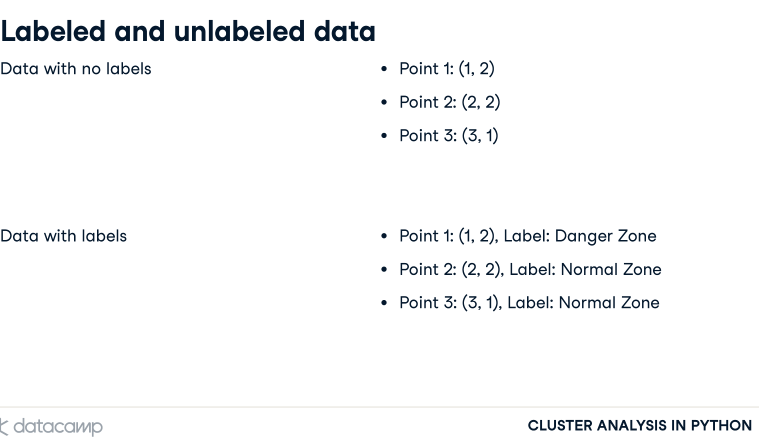


**Plotting data for clustering - Pokemon sightings**

We will plot the sightings of Pokemon in a park in the form of coordinates. 

* import the required class as plt
```
from matplotlib import pyplot as plt
```

* define the coordinates of points to be plotted in two lists - one each for x and y coordinates
```
x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]
```

> In this case, we have fifteen sightings that we would like to plot

* use the scatter method of the pyplot class, with the lists for the coordinates as arguments and the plot method to display the plot.

```
plt.scatter(x_coordinates, y_coordinates)
plt.show()
```
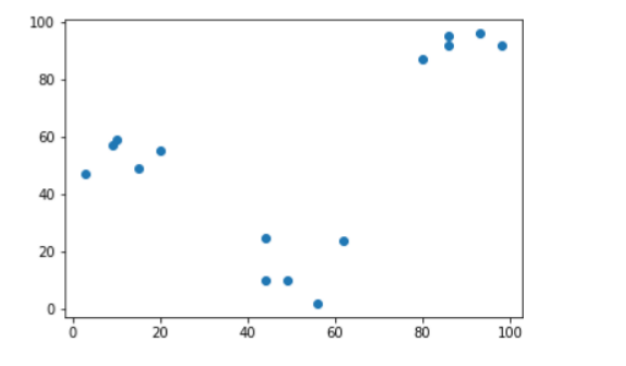

As a preliminary analysis before you perform any clustering analysis on the points, visualizing helps you understand how many natural clusters are present in the data. 

There are three clusters in the data, which are highlighted in the plot. By visualizing this data, you can infer with some confidence where the Pokemon actually are!

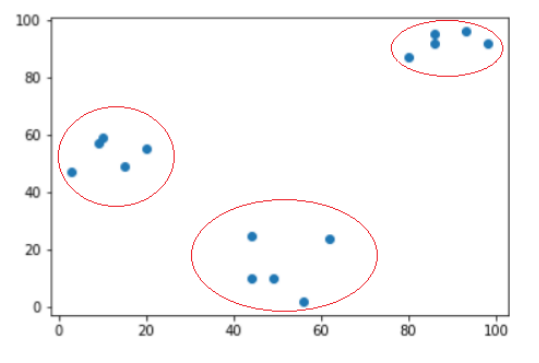

###Basics of cluster analysis

*What is a cluster?*

*  a cluster of news articles has similar words and word associations appearing in them.
* is segmentation of customers based on their spending habits - cluster of customers would exhibit similar spending habits.

*Clustering algorithms*:
* density based DBSCAN 
* Gaussian models
* hierarchical
* k-means clustering
* etc...

**Hierarchical clustering algorithm**

1. For demonstration purposes, let us consider 13 points on a 2D plane.

2. In the first step, all the points are considered as individual clusters. A cluster center is a mean of attributes of all data points in a cluster. In this case, cluster centers will have two attributes - the mean of x and y coordinates. At this stage, cluster centers of all clusters are the coordinates of the individual points.

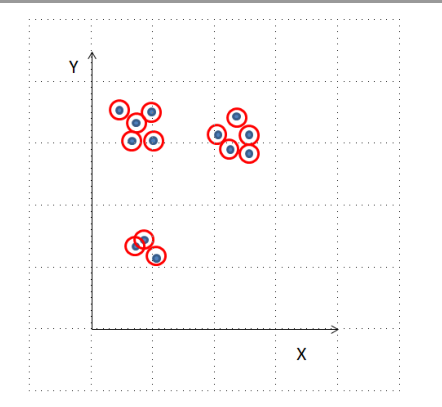

3. Next, the distances between all pairs of cluster centers are computed and **the two closest clusters are merged**. The cluster center of the merged cluster is then recomputed. In the example, two clusters on the bottom left have been merged. At this step, we are left with 12 clusters, one less than we started.

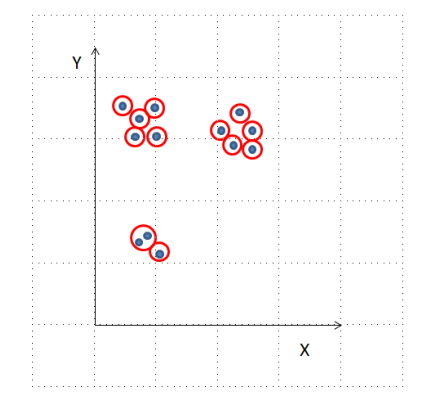

4. In the second step, **the clusters with the closest cluster centers are merged on the top left**. This process of merging the two closest clusters continues until we arrive at the desired clusters. At every step, the number of clusters reduces by one. As visible from the distribution of points, let us stop at three clusters.

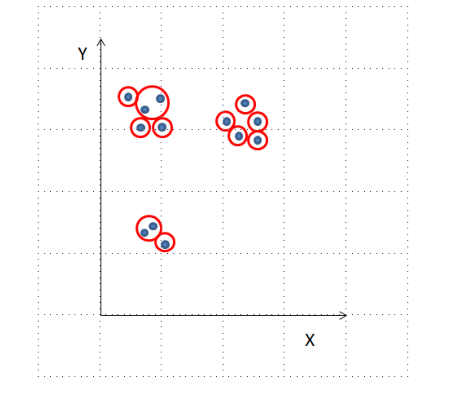

5. Finally, these are three clusters that you arrive at after the algorithm has run. 

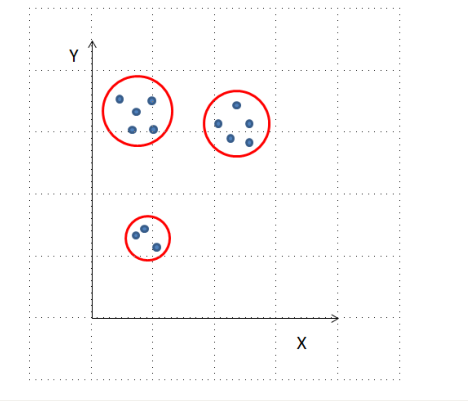

**Hierarchical clustering in SciPy**

The required methods for hierarchical clustering, linkage and fcluster, are stored in ```scipy.cluster.hierarchy```.

*  import pyplot and seaborn for visualization and pandas for data manipulation. A list of fifteen points with x and y coordinates is stored in a dataframe. 

```
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
'y_coordinate': y_coordinates})
```

* the linkage method computes distances between intermediate clusters

```
Z = linkage(df, 'ward')

```

* the fcluster method generates clusters and assigns associated cluster labels to a new column in the dataframe

```
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')
```

* plot the points using seaborn with the cluster labels as the hue argument to associate clusters with different colors

```
sns.scatterplot(x='x_coordinate', y='y_coordinate',
hue='cluster_labels', data = df)
plt.show()
```

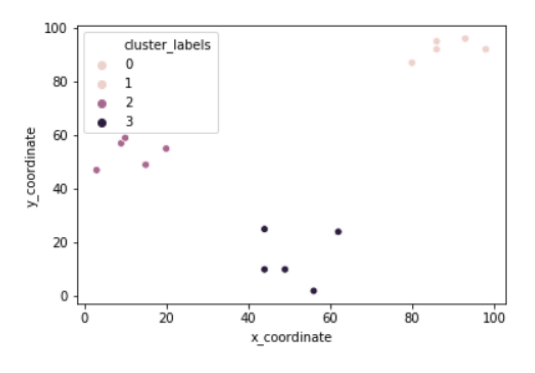

> the result of the seaborn scatterplot, shows the three clusters.

**K-means clustering algorithm**

1. First, a random cluster center is generated for each of the three clusters.

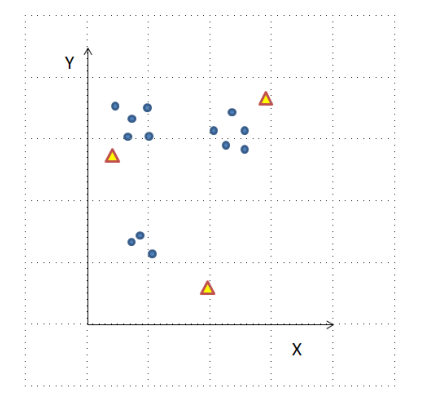

2. Next, the distance to these cluster centers is computed for each point to assign to the closest cluster.

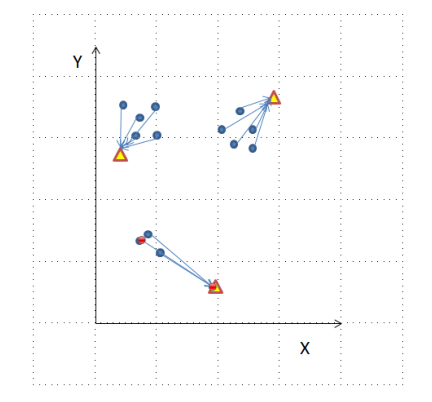

3. The cluster centers are recomputed. This iteration of assigning points to the recomputed cluster centers is performed a predefined number of times. Here, the clusters have been formed in the first iteration.

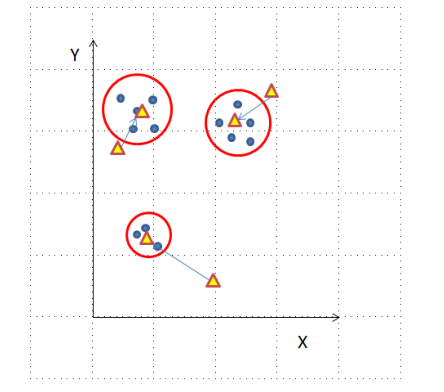

**K-means clustering in SciPy**

K-means clustering is implemented using methods kmeans and vq of ```scipy.cluster.vq```.

* The centroids of the clusters are computed using kmeans and cluster assignments for each point are done through vq

```
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
import random

random.seed((1000,2000))

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})

centroids,_ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)
```
> the second argument in both methods is distortion, which we capture in a dummy variable

* plot the clusters using seaborn

```
sns.scatterplot(x='x_coordinate', y='y_coordinate',
hue='cluster_labels', data = df)

plt.show()
```

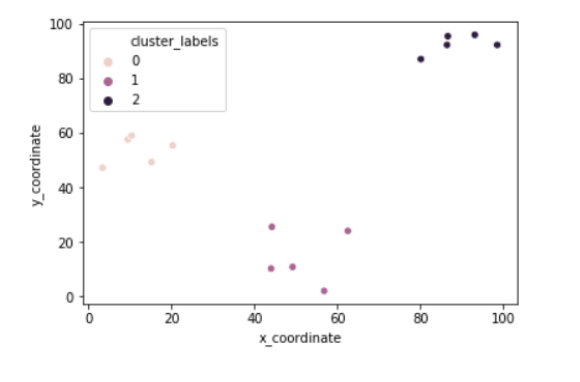

**hierarchical clustering**

form two clusters of the sightings using hierarchical clustering.

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd

* Import the linkage and fcluster libraries.
* Use the linkage() function to compute distances using the ward method.
* Generate cluster labels for each data point with two clusters using the fcluster() function.
* Plot the points with seaborn and assign a different color to each cluster.

```
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
```

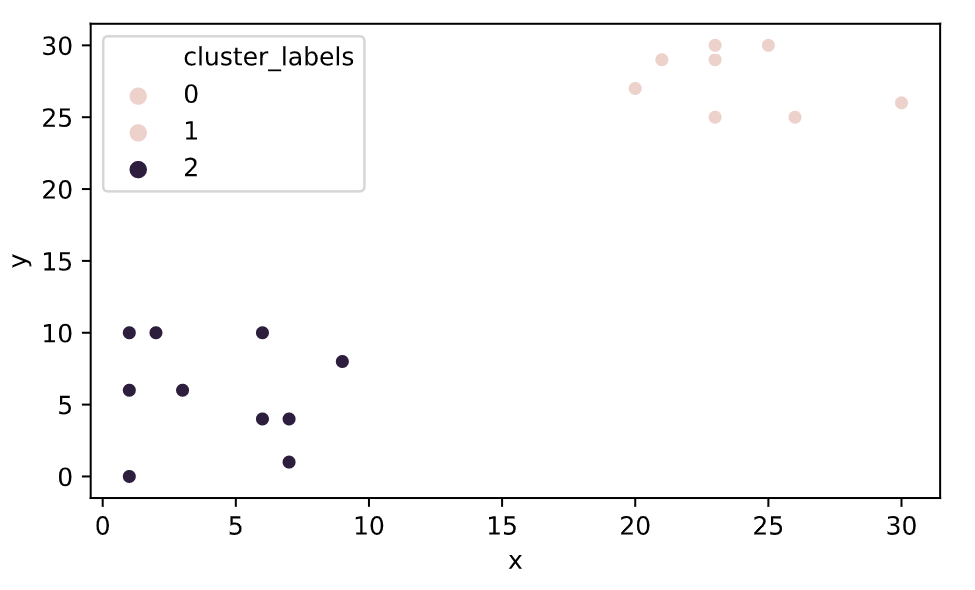

**k-means clustering**

orm clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

* Import the kmeans and vq functions.
* Use the kmeans() function to compute cluster centers by defining two clusters.
* Assign cluster labels to each data point using vq() function.
* Plot the points with seaborn and assign a different color to each cluster

```
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
```

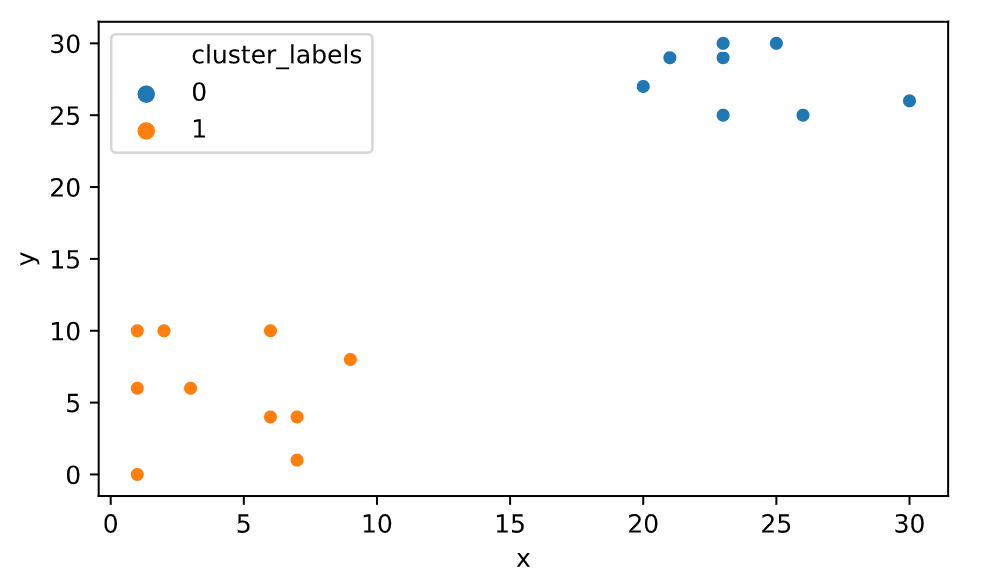

###Data preparation for cluster analysis

Now that you are familiar with the two basic clustering techniques, let us discuss an important step in processing data that we should apply before performing clustering.

*Why do we need to prepare data for clustering?*

 Imagine a situation where you have a set of variables with incomparable units  
 > such as the dimensions of a product and its price. 

 Even if variables have the same unit, they may be significantly different in terms of their scales and variances.

 For instance, the amount that one may spend on an inexpensive item like cereals is low as compared to traveling expenses. If we use data in this raw form, the results of clustering may be biased. The clusters formed may be dependent on one variable significantly more than the other. How do we account for these issues, then? We use a process called **normalization**.

*Normalization of data*

 It is a process by which we rescale the values of a variable with respect to standard deviation of the data.

 The resultant standard deviation post normalization is 1. The process of normalization is simple and achieved through **dividing a value by its standard deviation**. 

 A normalization library is available on the SciPy package, using the whiten method of the vq class. 

*  initiate the data to be normalized in a list and then use the whiten method, to transform. The array may be one or multi dimensional. 

> Note that, in the example, we use a one dimensional list. In case of a multi dimensional array or list of lists, whiten divides each value by the standard deviation of the column. The result of the whiten method is an array of the same dimensions.

```
from scipy.cluster.vq import whiten

data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)

print(scaled_data)

[2.73, 0.55, 1.64, 1.64, 1.09, 1.64, 1.64, 4.36, 0.55, 1.09, 1.09, 1.64, 2.73]
```

**Illustration: normalization of data**

Let us look at a plot using the matplotlib library in Python to compare the results of the normalization process. 

* import the pyplot class of the matplotlib library in Python

```
# Import plotting library
from matplotlib import pyplot as plt
```

* initialized the two lists which contain the original and scaled data points. By default, pyplot plots line graphs.

```
# Initialize original, scaled data
plt.plot(data,
label="original")
plt.plot(scaled_data,
label="scaled")
```

* enable the legend in the graph and then display the plot. 

> Let us see how the plot looks like.

```
# Show legend and display plot
plt.legend()
plt.show()
```
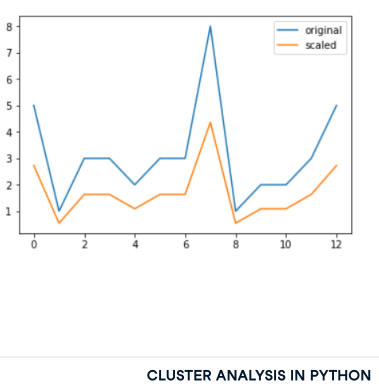




> The original and scaled lists have been plotted in blue and orange colors, respectively. The serial number of the points is in the x axis, whereas the value of the original and scaled data points is in the y axis. As you can see, the variation in the scaled data has been toned down from the original data. Interestingly, the trends remain similar to the original data though.

**Normalize basic list data**

try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

* Import the whiten function.
* Use the whiten() function to standardize the data.

```
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)
```

```
[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077 1.53846154 0. 0.76923077 3.07692308]
```

**Visualize normalized data**

After normalizing your data, you can compare the scaled data to the original data to see the difference. The variables from the last exercise, goals_for and scaled_data are already available to you.

* Use the matplotlib library to plot the original and scaled data.
* Show the legend in the plot.
* Display the plot.

```
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()
```

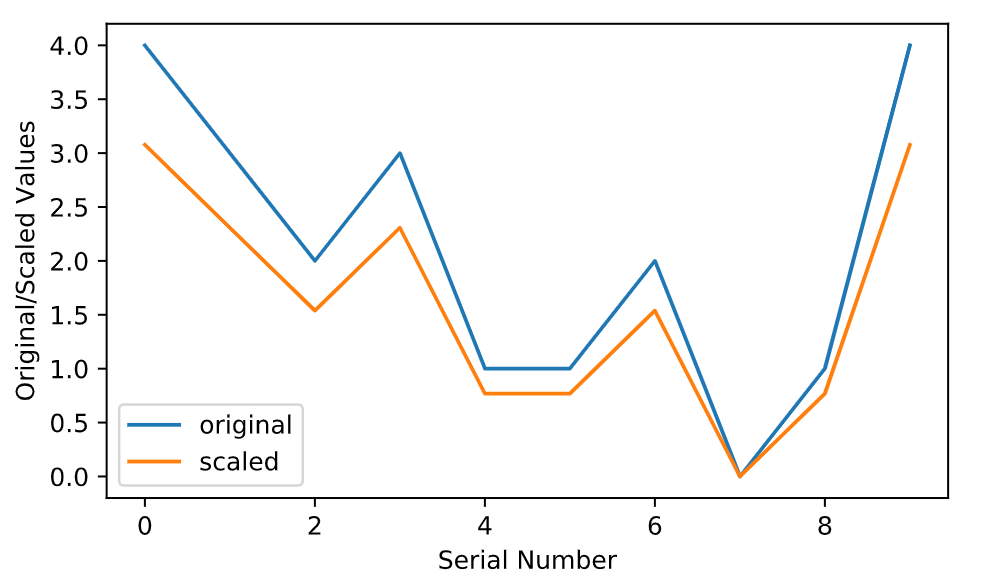

**Normalization of small numbers**

In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt.

* Scale the list rate_cuts, which contains the changes in interest rates.
* Plot the original data against the scaled data.

```
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()'
```

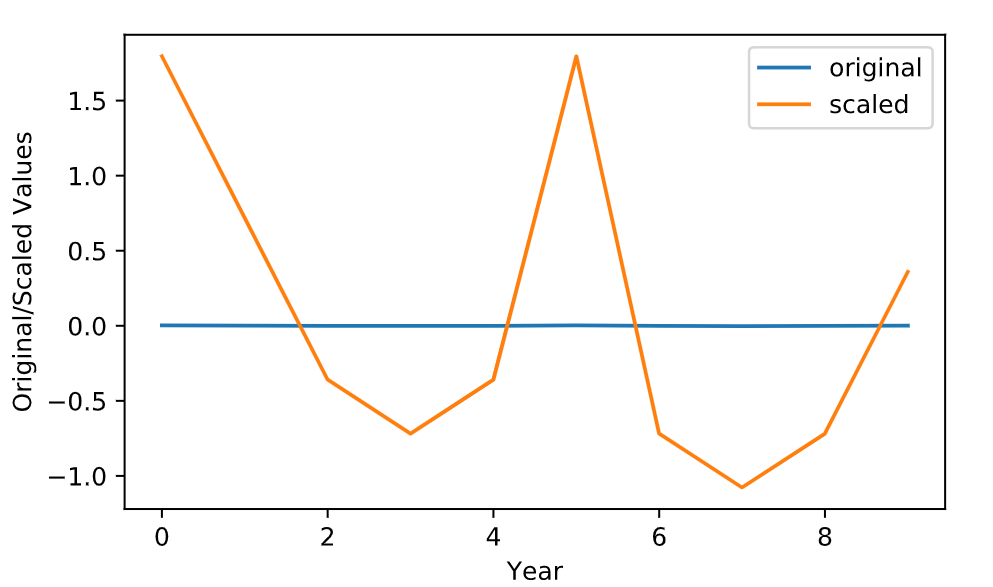

> Notice how the changes in the original data are negligible as compared to the scaled data

**FIFA 18: Normalize data**

The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

The data for this exercise is stored in a Pandas dataframe, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.

* Scale the values of eur_wage and eur_value using the whiten() function.

```
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])
```

* Plot the scaled wages and transfer values of players using the .plot() method of Pandas.

```
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()
```
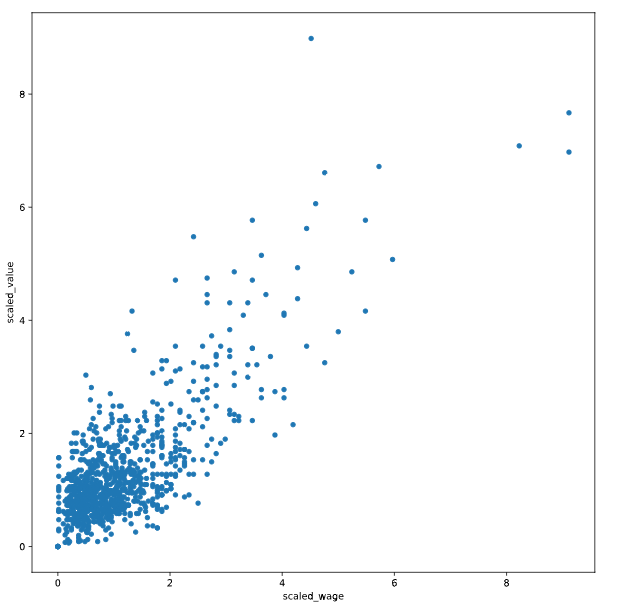
* Check the mean and standard deviation of the scaled data using the .describe() method of Pandas.

```
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())
```

```
<script.py> output:
           scaled_wage  scaled_value
    count      1000.00       1000.00
    mean          1.12          1.31
    std           1.00          1.00
    min           0.00          0.00
    25%           0.47          0.73
    50%           0.85          1.02
    75%           1.41          1.54
    max           9.11          8.98
```

> As you can see the scaled values have a standard deviation of 1.

##Hierarchical Clustering

###Basics of hierarchical clustering

This chapter focuses on performing hierarchical clustering with SciPy.

*Creating a distance matrix using linkage*

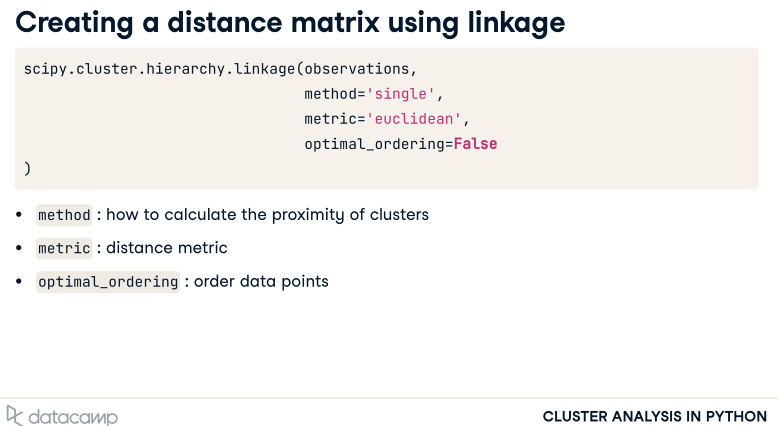

A critical step is to compute the distance matrix at each stage. This is achieved through the linkage method available in ```scipy.cluster.hierarchy```.

his process computes the distances between clusters as we go from N clusters to 1 cluster, where N is the number of points. 
There are four parameters for this method. 
* The first parameter is the **observations**. 
* The second parameter, **method**, tells the algorithm how to calculate proximity between two clusters. 
* The **metric** is the function that decides the distance between two objects. 
 **Euclidean distance** is a straight line distance between two points on a 2D plane. 

> **The optimal_ordering** is an optional argument that changes the order of linkage matrix. 

*Which method should use?*

The second parameter, method, decides how clusters are separated at each step. 

* **The single method** decides the proximity of clusters based on their two closest objects. 
* **The complete method** decides the proximity of cluster centers based on their two farthest objects. 
* **The average and centroid methods** decide cluster proximities based on arithmetic and geometric means, respectively. 
* **The median method** uses the median of cluster objects. 
* **The ward method** that we used earlier computes cluster proximity using the difference between summed squares of their joint clusters minus the individual summed squares. The ward method focuses on clusters more concentric towards its center.
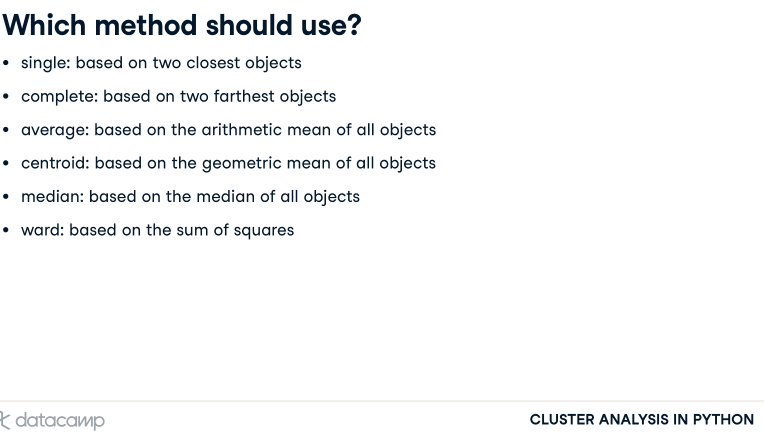
**Create cluster labels with fcluster**



Once you have created the distance matrix, you can create the cluster labels through the fcluster method, which takes three arguments 
* the distance matrix, 
* the number of clusters 
* and the criteria to form the clusters based on certain thresholds.

**Hierarchical clustering with ward method**

Notice that clusters are generally dense towards the centers.
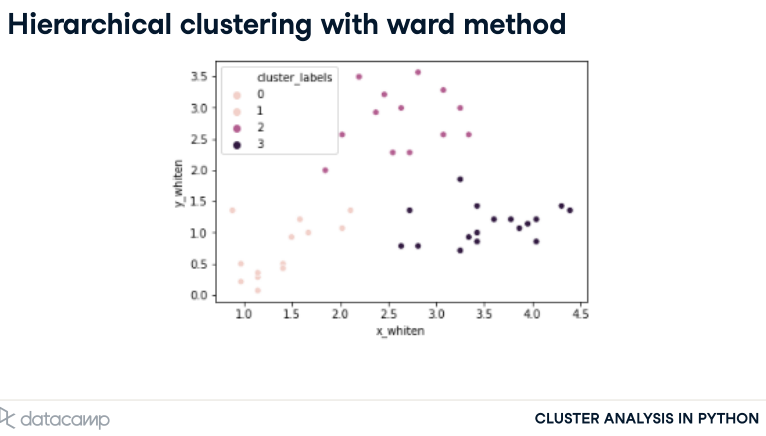


**Hierarchical clustering with single method**

Recall the single method used the two closest objects between clusters to determine the inter-cluster proximity. 

> Naturally, the clusters formed when performing clustering through this method are more dispersed. Although the top cluster, labelled 1, is roughly the same, most objects from cluster 3 have shifted to cluster 2.

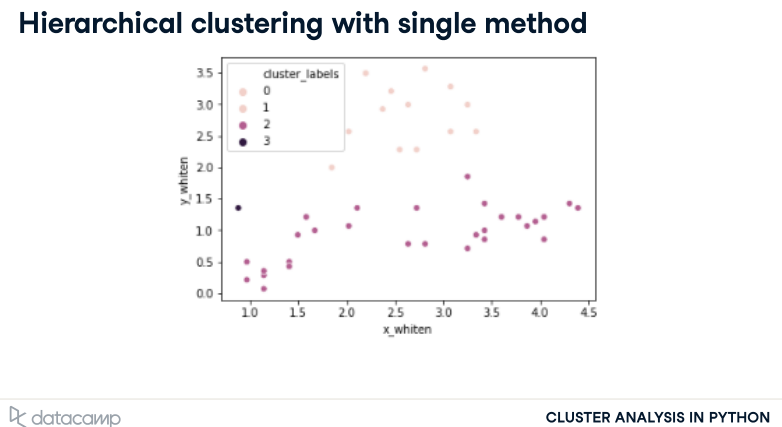

**Hierarchical clustering with complete method**

This method uses the two farthest objects among clusters to determine inter-cluster proximity. Coincidentally, though, the results of the complete method on the same data points that we used is similar to that of the ward method.

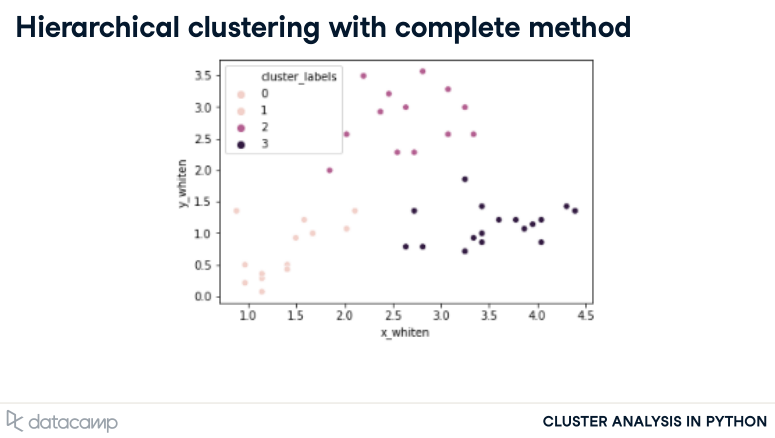

**Hierarchical clustering: ward method**

omic-Con is an annual comic-based convention held in major cities in the world. You have the data of last year's footfall, the number of people at the convention ground at a given time. You would like to decide the location of your stall to maximize sales. Using the ward method, apply hierarchical clustering to find the two points of attraction in the area.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

* import fcluster and linkage from scipy.cluster.hierarchy.
* Use the ward method in the linkage() function.
* Assign cluster labels by forming 2 flat clusters from distance_matrix.
* Run the plotting code to see the results.

```
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

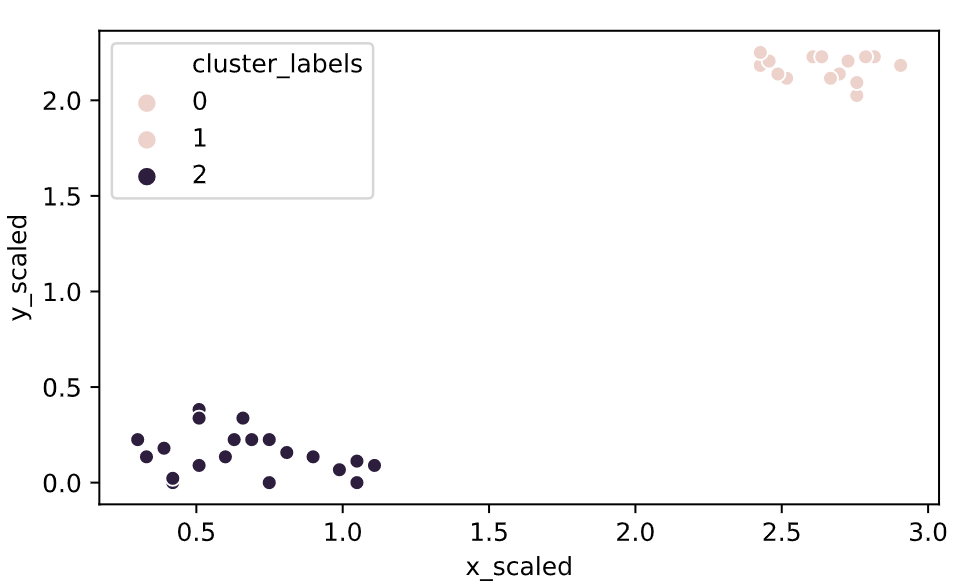

**Hierarchical clustering: single method**

Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.


* Import fcluster and linkage from scipy.cluster.hierarchy.
* Use the single method in the linkage() function.

```
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

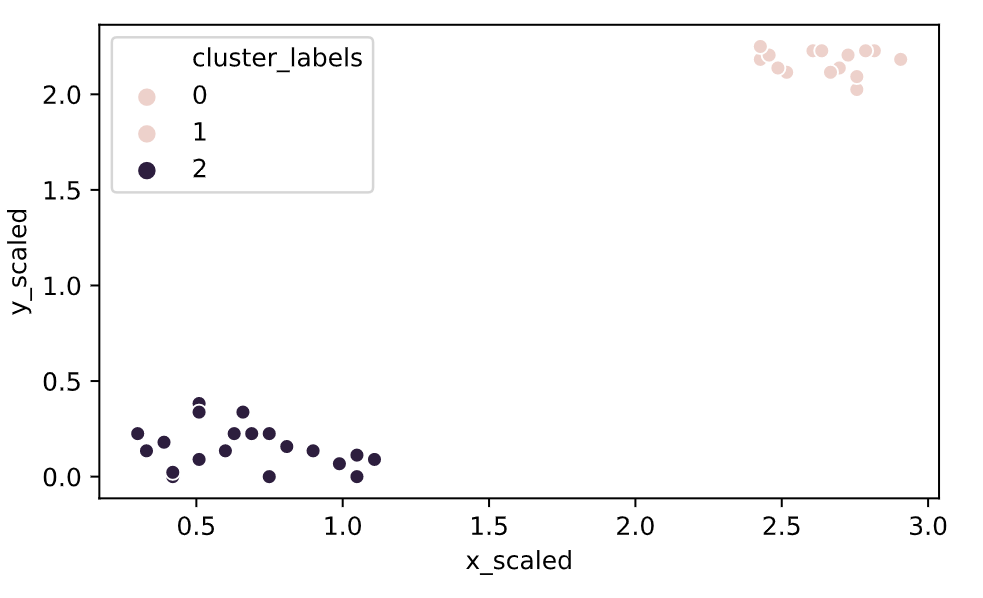

>  Notice that in this example, the clusters formed are not different from the ones created using the ward method.

**Hierarchical clustering: complete method**

For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

* Import fcluster and linkage from scipy.cluster.hierarchy.
* Use the complete method in the .linkage() function.

```
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

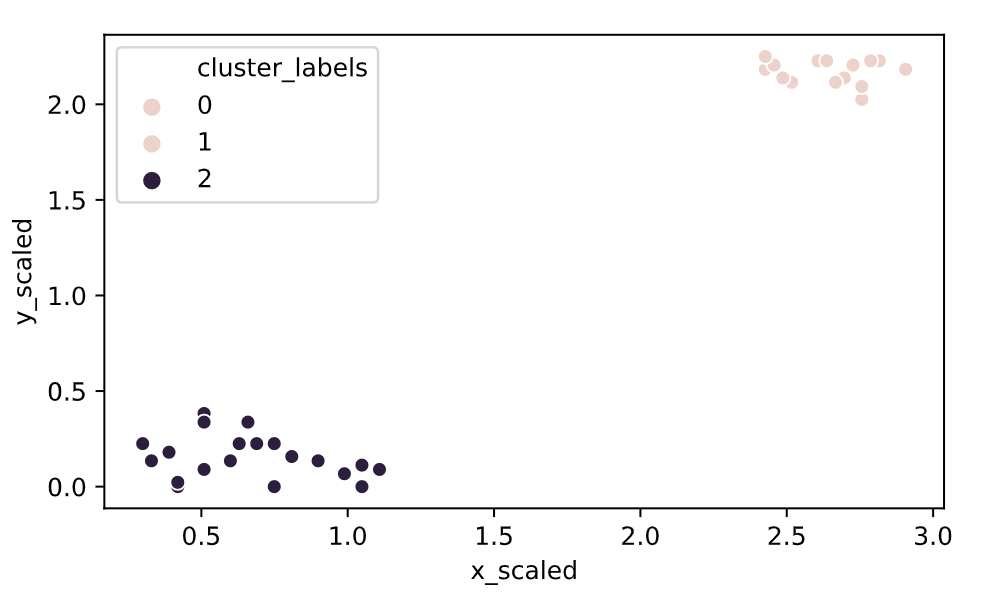

###Visualize clusters

**Why visualize clusters?**

One can quickly make sense of the clusters formed by any algorithm by visually analyzing it.

It can serve as an additional step for validation of clusters formed. Additionally, you may also spot trends in your data by visually going through it.

**Visualize clusters with matplotlib and seaborn**

* first import the pyplot class in matplotlib

```
import matplotlib.pyplot as plt
```

* start with a Pandas data frame which has the columns - x, y and label for its x and y coordinates and cluster labels, A and B. 

```
df = pd.DataFrame({'x': [2, 3, 5, 6, 2],
'y': [1, 1, 5, 5, 2],
'labels': ['A', 'A', 'B', 'B', 'A']})
```


* use the c argument of the scatter method, to assign a color to each cluster. However, we first need to manually map each cluster to a color. Therefore, we define a dictionary named colors with the cluster labels as keys, and the color associated with the clusters as its values. We then pass a list of colors to c argument using a lambda function, which returns the corresponding value of each cluster label

```
colors = {'A':'red', 'B':'blue'}

df.plot.scatter(x='x', y='y',
c=df['labels'].apply(lambda x: colors[x]))

plt.show()
```

**Visualize clusters with seaborn**

 We use the same data frame as earlier to visualize the clusters. To visualize the data points with each point associated with a separate color, we use the hue argument of the scatterplot method, and pass on the column name of the cluster labels, which is labels in this example.

 ```
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.DataFrame({'x': [2, 3, 5, 6, 2], 'y': [1, 1, 5, 5, 2], 'labels': ['A', 'A', 'B', 'B', 'A']})

sns.scatterplot(x='x', y='y', hue='labels', data=df)
plt.show()
```

**Comparison of both methods of visualization**
Recall from the last lesson that seaborn shows an extra cluster with label 0 if the cluster labels are integers. In this example, we have manually assigned string cluster labels, so this issue will not arise.

Although the results are comparable, there are two reasons why we prefer seaborn. 
* First, the implementation using seaborn was more convenient once you have stored cluster labels in your data frame. 
* Second, you do not need to manually select colors in seaborn as it would be using a default palette no matter how many clusters you have.

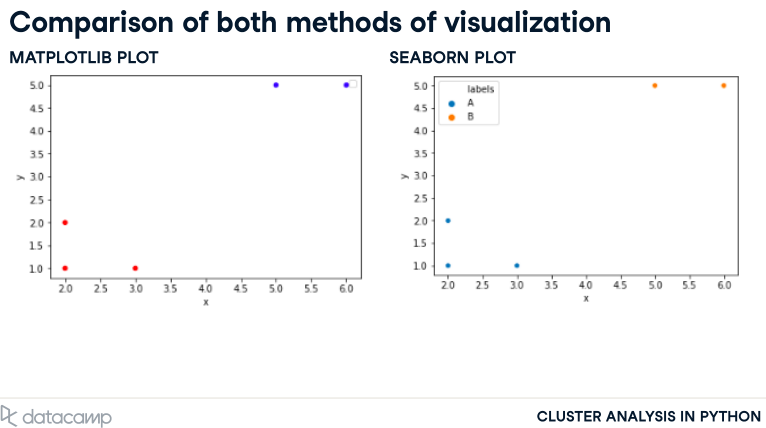



**Visualize clusters with matplotlib**

Let us now focus on visualizing the footfall dataset from Comic-Con using the matplotlib module.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

* Import the pyplot class from matplotlib module as plt.
* Define a colors dictionary for two cluster labels, 1 and 2.
* Plot a scatter plot with colors for each cluster as defined by the colors dictionary.

```
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1 :'red', 2 :'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()
```

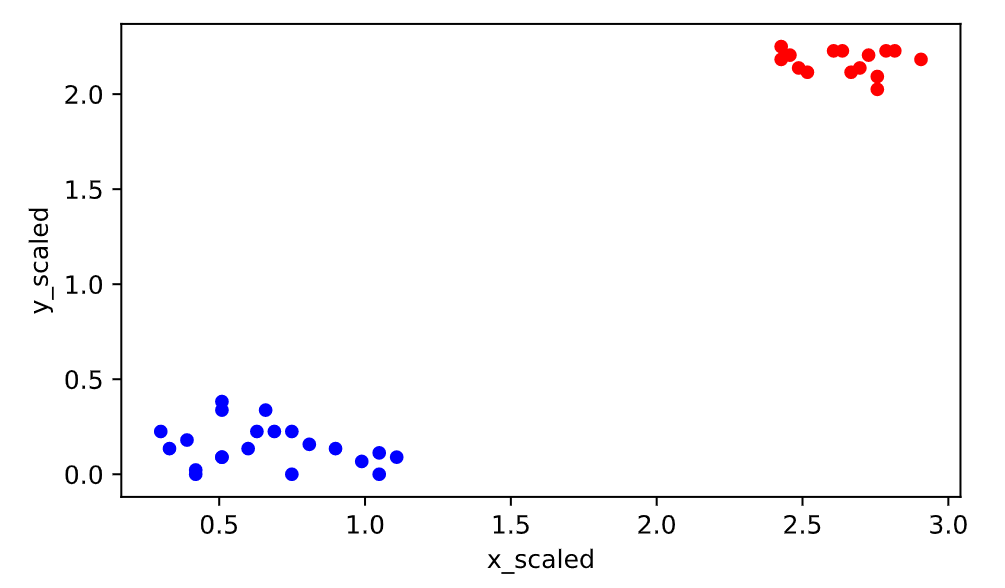

**Visualize clusters with seaborn**

visualize the footfall dataset from Comic Con using the seaborn module. Visualizing clusters using seaborn is easier with the inbuild hue function for cluster labels.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

* Import the seaborn module as sns.
* Plot a scatter plot using the .scatterplot() method of seaborn, with the cluster labels as the hue argument.

```
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()
```

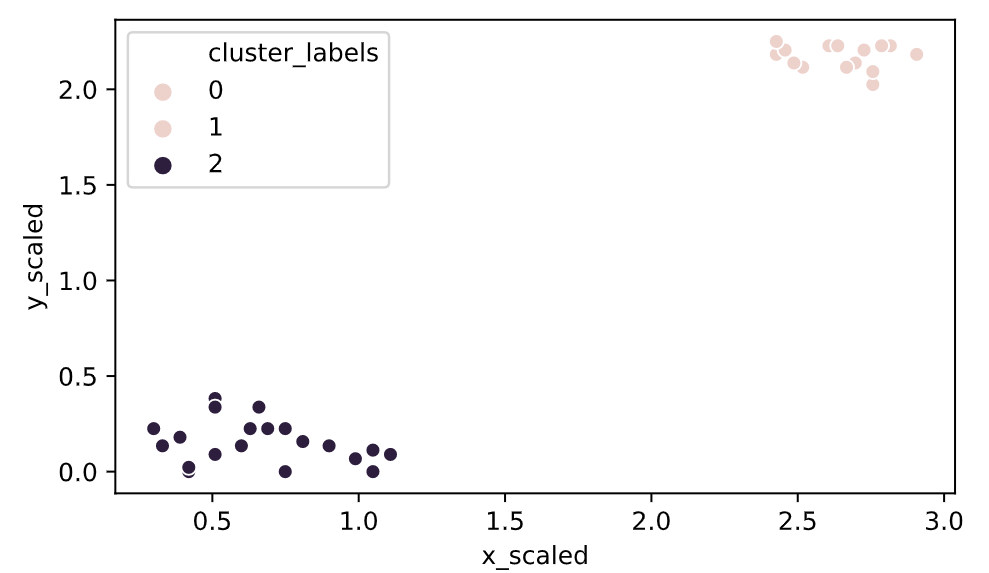

###How many clusters?


> To decide on the number of clusters in hierarchical clustering, we can use a graphical diagram called the dendrogram. 

**Create a dendrogram in SciPy**

* import the method from ```scipy.cluster.hierarchy``` 

```
from scipy.cluster.hierarchy import dendrogram
```

* use the linkage method to create a distance matrix

```
Z = linkage(df[['x_whiten', 'y_whiten']],
method='ward',
metric='euclidean')
```

* use the dendrogram method and provide the linkage object as an argument, and display the plot

```
dn = dendrogram(Z)
plt.show()
```
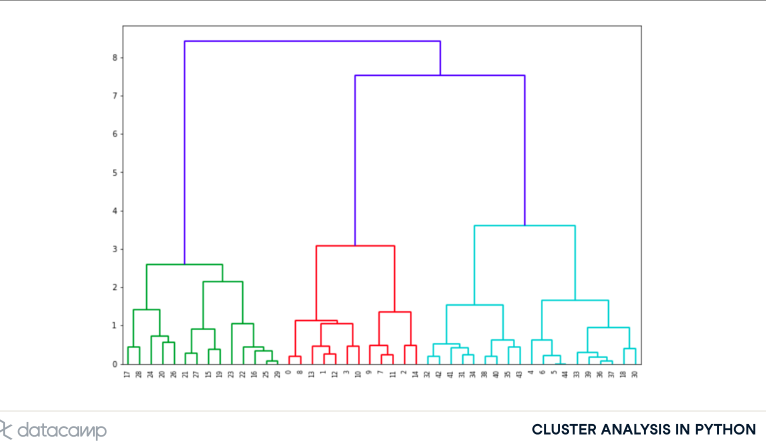


 Recall the hierarchical clustering algorithm, where each step was a result of merging of two closest clusters in the earlier step. The x axis represents individual points, whereas the y axis represents the distance or dissimilarity between clusters.
 
 > In the dendrogram, each inverted U represents a cluster divided into its two child clusters. 


 The inverted U at the top of the figure represents a single cluster of all the data points. The width of the U shape represents the distance between the two child clusters. A wider U, therefore, means that the two child clusters were farther away from each other as compared to a narrower U in the diagram.

If you draw a horizontal line at any part of the figure, the number of vertical lines it intersects tells you the number of clusters at that stage, and the distance between those vertical lines indicates the inter-cluster distance. At the horizontal line drawn on the figure, we see that there are three clusters.

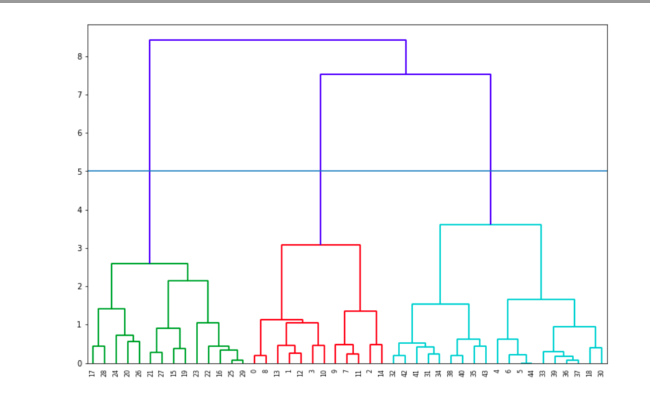

 When you move the line below, the number of clusters increases but the inter-cluster distance decreases. 
 > This information helps us in deciding the number of clusters. 

 For instance, even though we haven't looked at the distribution of the data points, it seems that the top three clusters have the highest distances between them. At this point, I must reiterate that there is no right metric to decide how many clusters are ideal. 

 Here is the result of performing the clustering with two clusters.

 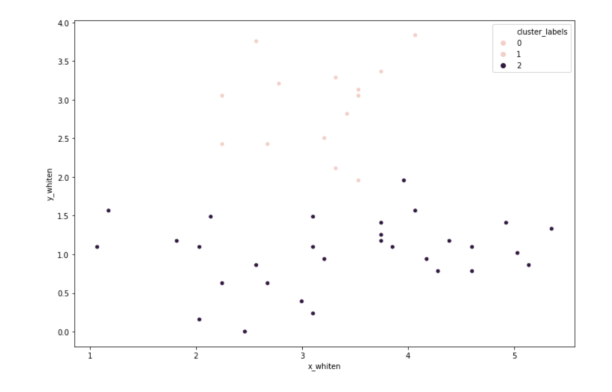

Here is the result with three clusters.

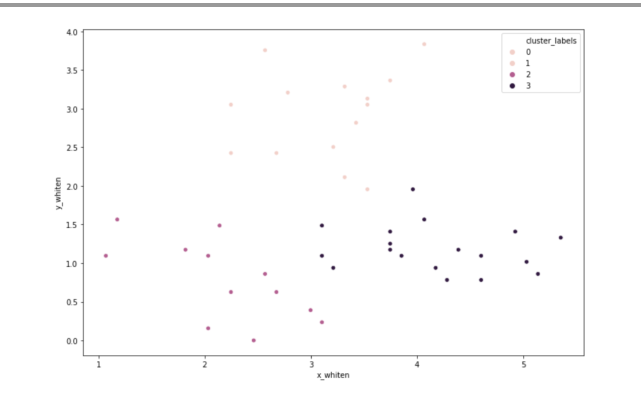

And here is how 4 clusters look on the data. 

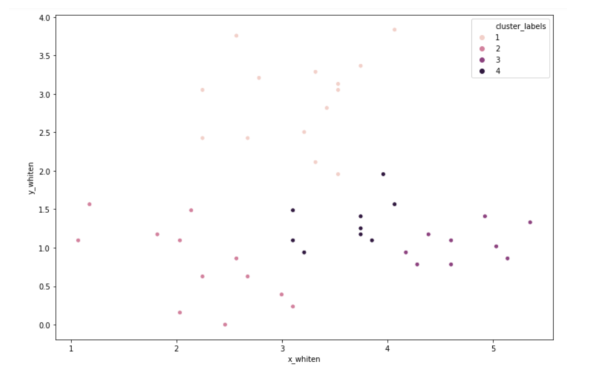

> Although the dendorgram indicated we could go ahead with three clusters, the case with four clusters makes sense too. Therefore, an additional check of visualizing the data may be performed before deciding on the number of clusters.

**Create a dendrogram**

Let us use the Comic Con footfall data to create a dendrogram.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time. cluster_labels has the cluster labels. A linkage object is stored in the variable distance_matrix.

* Import the dendrogram function from scipy.cluster.hierarchy.
* Create a dendrogram using the linkage object.
* Display the dendrogram using .show() method of the plt object.

```
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()
```

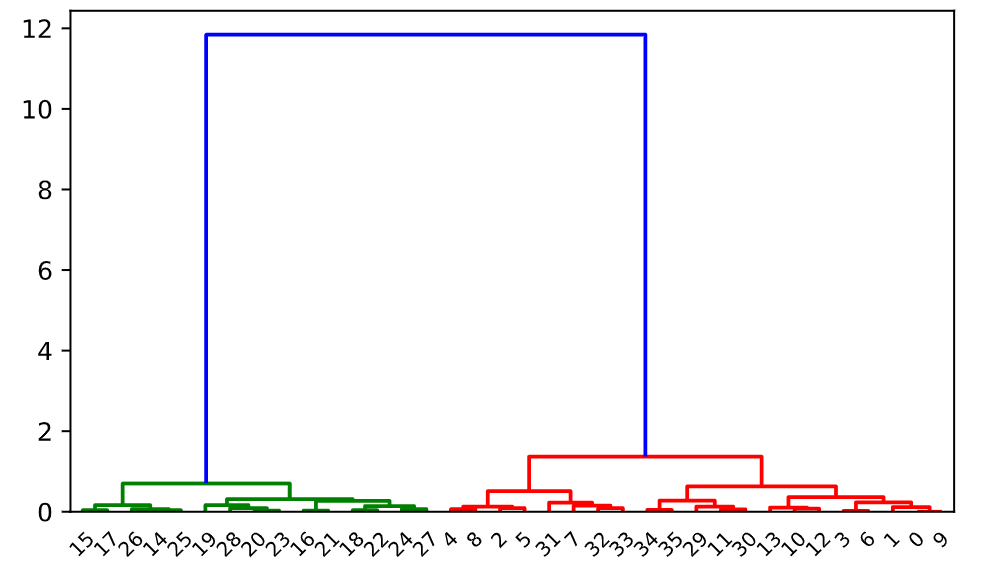

###Limitations of hierarchical clustering

Now that you are familiar with hierarchical clustering let us look at the challenges when performing this type of clustering.

**Measuring speed in hierarchical clustering**

We will use the **timeit module** to check runtime of functions. 

As the most time-consuming step in the process of hierarchical clustering is constructing the distance matrix through the linkage method, we will time the amount of time it takes to form the matrix.

 For the purpose of this exercise, we will use randomly generated data points on the XY plane. To test the limits of the algorithm, we will use an increasing number of data points.


> let us look at how long it takes to run the linkage method for 100 points with randomly generated coordinates. 

*  import the random and timeit modules to generate the points and time the runtime of a function respectively

```
from scipy.cluster.hierarchy import linkage
import pandas as pd
import random, timeit
```

*  create a data frame with 100 points, and randomly generate 100 points within coordinates in the range of zero to a hundred

```
points = 100
df = pd.DataFrame({'x': random.sample(range(0, points), points),
'y': random.sample(range(0, points), points)})
```

* To check the time of a function in the interpreter, we use the percent symbol before the timeit keyword followed by the statement that we were about to run. 

> The timeit module runs the function multiple times and reports the mean and standard deviations of the runtimes.

```
%timeit linkage(df[['x', 'y']], method = 'ward', metric = 'euclidean')

1.02 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
```

Let us now perform iterations for an increasing number of points, check how long it takes to run the linkage method and then plot a graph to compare the performace.


**Comparison of runtime of linkage method**

If you plot the runtime of the linkage method with the number of points, you can see that the runtime increases with the increase in number of data points. In addition to it, you would notice that the increase in run time is not linear with respect to the increase in data points, but quadratic. This makes the technique of hierarchical clustering infeasible for huge number of data points, for instance, the shopping habits of all customers in Walmart in a year.


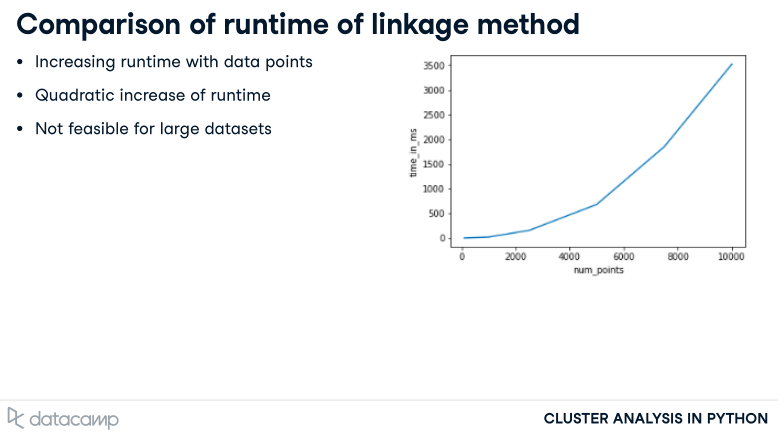

**FIFA 18: exploring defenders**

 the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
aggression: a number between 0-99 which signifies the commitment and will of a player
These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

This data consists of 5000 rows, and is considerably larger than earlier datasets. Running hierarchical clustering on this data can take up to 10 seconds.

The following modules are pre-loaded: dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt, seaborn as sns. The data is stored in a Pandas dataframe, fifa.

* Fit the scaled data in columns scaled_sliding_tackle and scaled_aggression into a hierarchical clustering algorithm. Additionally, you may want to check how long it takes to run the data in the console using the timeit module.

```
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')
```

* Assign cluster labels to each row in the data using the fcluster() function (use 3 clusters).

```
# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')
```

* Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.

```
# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())
```

```
<script.py> output:
                    scaled_sliding_tackle  scaled_aggression
    cluster_labels                                          
    1                                2.99               4.35
    2                                0.74               1.94
    3                                1.34               3.62
```

* Create a scatter plot using seaborn with the scaled_sliding_tackle attribute on the x-axis and the scaled_aggression attribute on the y-axis. Assign a different color to each cluster.

```
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()
```

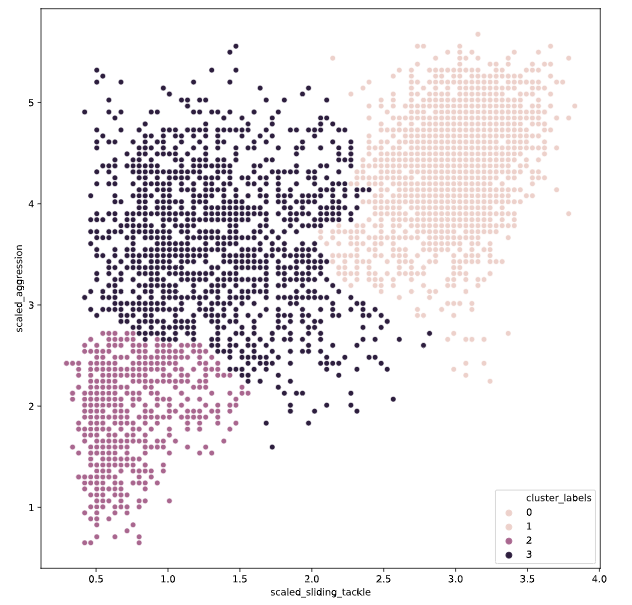

>  Notice how long it took to run hierarchical clustering on a few thousand data points. In the next chapter, you will explore clusters in data through k-means clustering.

##K-Means Clustering

###Basics of k-means clustering

K-means clustering, allows to cluster large datasets in a fraction of the time.
To perform K-Means clustering in scipy, there are two steps involved - **generate the cluster centers** and then **assign the cluster labels**.

**Step 1: Generate cluster centers**

 The first step is performed by the kmeans method. There are five arguments for this method:
 * The ** first argument is the list of observations**, which have been standardized through the whiten method. 
 * The **second argument**, k_or_guess, is **the number of clusters**. 
 * The **third argument** is the **number of iterations of the algorithm to perform**. Its default value is 20. 
 * The **fourth argument is the threshold**. The idea behind this argument is that the algorithm is terminated if the change in distortion since the last k-means iteration is less than or equal to the threshold. Its default value is 10 raised to the power minus 5, or 0-point-00001. 
 * The **last argument** is a boolean **value indicating if a check needs to be performed on the data for the presence of infinite or NaN values**. The default value is True, which ensures that data points with NaN or infinite values are not considered for classification, which ensures that the results are accurate and unbiased.

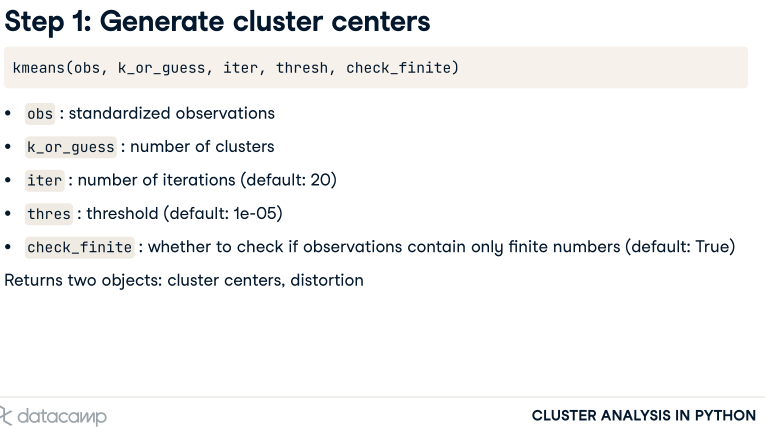

The k-means function returns two arguments, the cluster centers and distortion. The cluster centers, is also known as the code book.

*How is distortion calculated?*

The distortion is calculated as the sum of square of distances between the data points and cluster centers, as demonstrated in this figure.
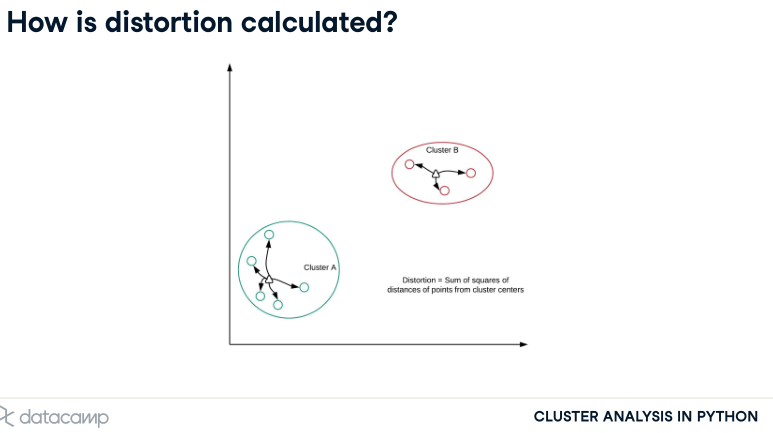


**Step 2: Generate cluster labels**

The next step is to use the vq method to generate cluster labels. It takes three arguments:
* The **first argument is the list of observations**, which have been standardized through the whiten method. 
* The **second argument is the code book**, that is the first output of the kmeans method. 
* The **third optional argument is check_finite**, a boolean value indicating if a check needs to be performed on the data for the presence of infinite or NaN values. By default, its value is set to True. The function returns the cluster labels, also known as the "code book index" and the distortion.

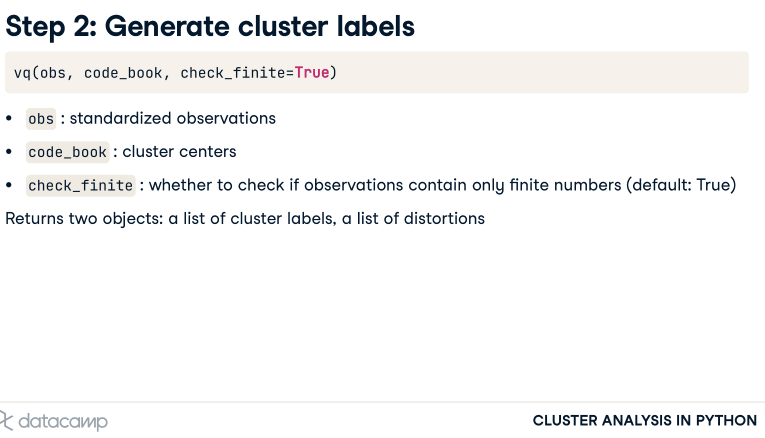

*A note on distortions*

kmeans returns a single value of distortions based on the overall data, whereas vq returns a list of distortions, one for each data point. The mean of the list of distortions from the vq method should approximately equal the distortion value of the kmeans method if the same list of observations is passed.

**Running k-means**

* import kmeans and vq. 

```
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq
```

* use the kmeans to get cluster centers and vq to get cluster labels.

```
# Generate cluster centers and labels
cluster_centers, _ = kmeans(df[['scaled_x', 'scaled_y']], 3)
df['cluster_labels'], _ = vq(df[['scaled_x', 'scaled_y']], cluster_centers)
```

* display a scatter plot with seaborn.

```
# Plot clusters
sns.scatterplot(x='scaled_x', y='scaled_y', hue='cluster_labels', data=df)
plt.show()
```

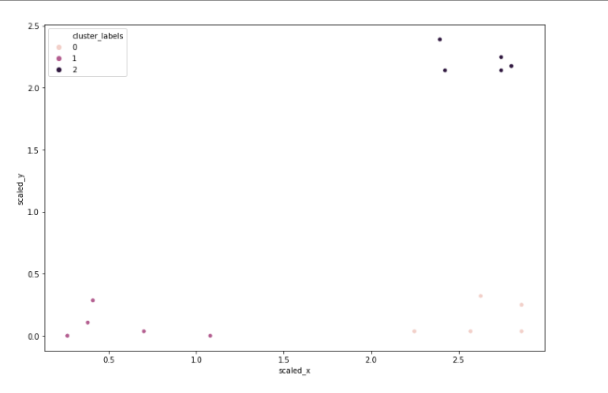

> Notice the three distinct clusters in the figure.

**K-means clustering: first exercise**

Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

Define cluster centers through kmeans() function. It has two required arguments: observations and number of clusters.
Assign cluster labels through the vq() function. It has two required arguments: observations and cluster centers.
The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

* Import kmeans and vq functions in SciPy.
* Generate cluster centers using the kmeans() function with two clusters.
* Create cluster labels using these cluster centers.

```
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

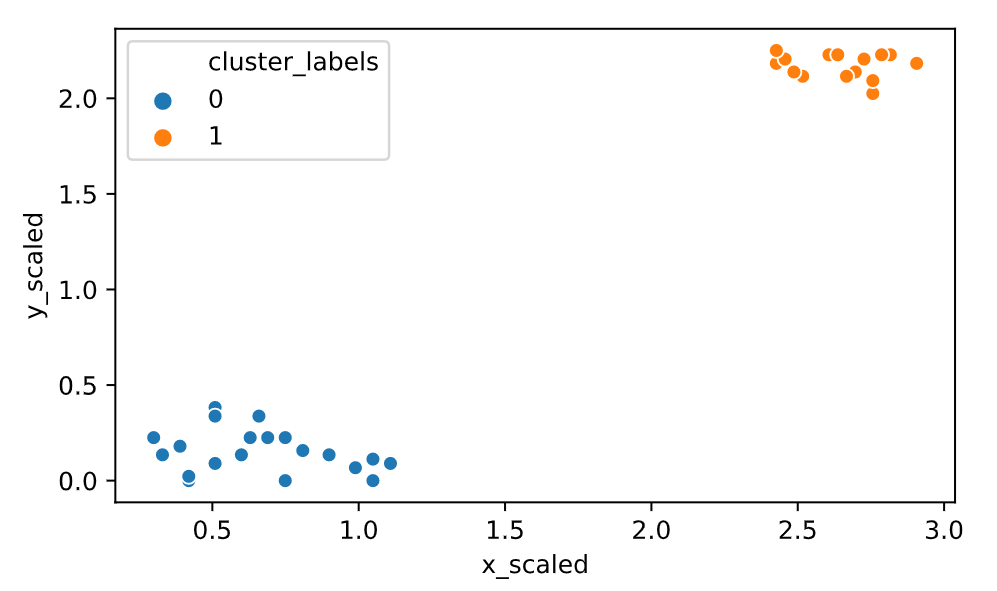

> Notice that the clusters formed are exactly the same as hierarchical clustering that you did in the previous chapter.

###How many clusters?

One critique of k-means clustering is that there is no right way of finding out how many clusters exist in your dataset. But there are some methods, to help us decide how many clusters should we use in k-means. One of them is **constructing an elbow plot to decide the right number of clusters for your dataset.**

*Distortions revisited*

The distortion is the sum of the squares of distances between each data point and its cluster center. 

> Ideally, distortion has an inverse relationship with the number of clusters - which means that distortion decreases with increasing number of clusters. 

 This trend is intuitive - as *segmenting the data into smaller fragments will lead to clusters being closer together, leading to a lower distortion*. **This is the underlying logic of the elbow method**, which is a line plot between the number of clusters and their corresponding distortions.

**Elbow method**

We first run k-means clustering with a varying number of clusters on the data, and construct an elbow plot, which has the number of clusters on the x-axis and distortion on the y-axis. 

The number of clusters can start from one to the number of data points. The ideal point is one beyond which the distortion decreases relatively less on increasing the number of clusters.

* decide the range of number of clusters that we would like to run the algorithm for. 

> In this case, cluster sizes range from 2 to 6. 

```
# Declaring variables for use
distortions = []
num_clusters = range(2, 7)
```

* collect the distortion from each run of the k-means method and plot the two lists using seaborn: run the k-means method for each cluster and collect the corresponding distortions in a list for use later 

```
# Populating distortions for various clusters
for i in num_clusters:
  centroids, distortion = kmeans(df[['scaled_x', 'scaled_y']], i)
  distortions.append(distortion)
```

* create a data frame with the distortions for each number of clusters and plot it using seaborn, with number of clusters on x axis and distortion on y axis.

```
# Plotting elbow plot data
elbow_plot_data = pd.DataFrame({'num_clusters': num_clusters,
'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions',
data = elbow_plot_data)
plt.show()
```

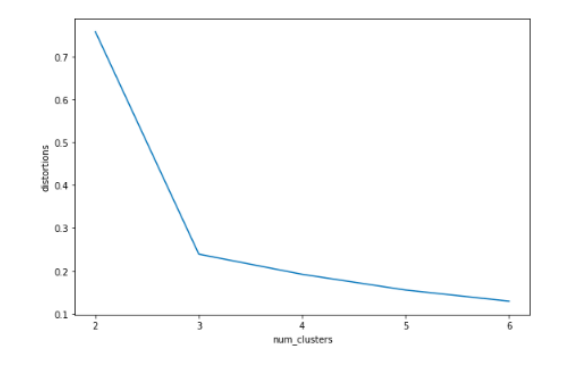

> This is a sample elbow plot. You would notice that distortion decreases sharply from 2 to 3 clusters, but has a very gradual decrease with a subsequent increase in number of clusters. The ideal number of clusters here is therefore, 3.

*Sometimes elbow method is not enough*

 The elbow method only gives an indication of ideal number of clusters. Occasionally, it may be insufficient to find an optimal k. For instance, the elbow method fails when data is evenly distributed. There are other methods to find the optimal number of clusters such as the average silhouette and gap statistic methods.

**Elbow method on distinct clusters**

Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

* Create a list of distortions for each cluster in num_clusters.
* Create a data frame elbow_plot with num_clusters and distortions.
* With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.

```
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()
```

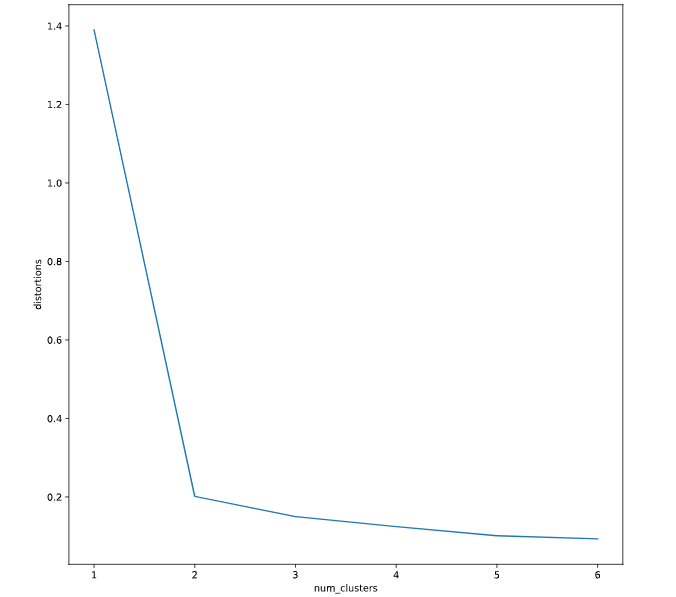

**Elbow method on uniform data**

Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.

The data is stored in a Pandas data frame, uniform_data. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of points.

* Create a list of distortions for each cluster in num_clusters.
* Create a data frame elbow_plot with num_clusters and distortions.
* With the .lineplot() method, plot elbow_plot with num_clusters in the x axis and distortions in the y axis.

```
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()
```

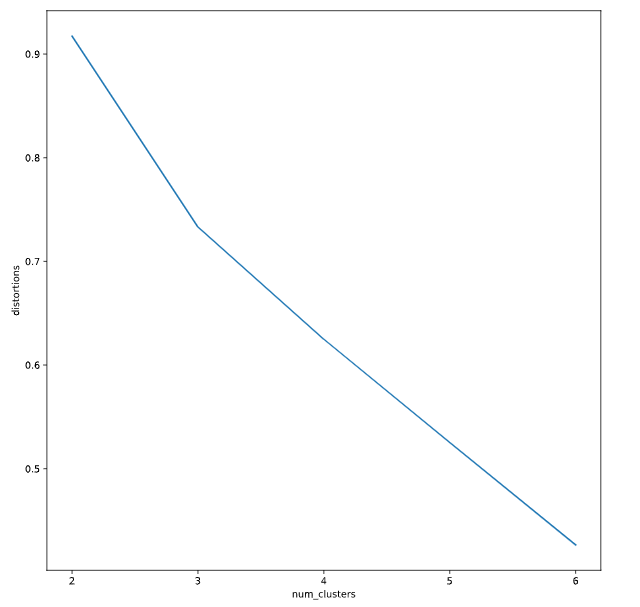

> This is no well defined elbow in this plot!

###Limitations of k-means clustering

*Earlier, we saw that k-means clustering overcomes the biggest drawback of hierarchical clustering, runtime.* 


However, it comes with its own set of limitations which you should consider while using it. 

* The first issue is **the procedure to find the right number of clusters**, k. As discussed earlier, the elbow method is one of the ways to determine the right k, but may not always work. 

* The next limitation of k-means clustering is the **impact of seeds on clustering**, which we will explore shortly. 

* The final limitation that we will explore is the **formation of equal-sized clusters**.

**Impact of seeds**

As the process of defining the initial cluster centers is random, this initialization can affect the final clusters. Therefore, to get consistent results when running k-means clustering on the same dataset multiple times, it is a good idea to set the initialization parameters for random number generation. The seed is initialized through the seed method of random class in numpy. You can pass a single integer or a 1D array as an argument. 


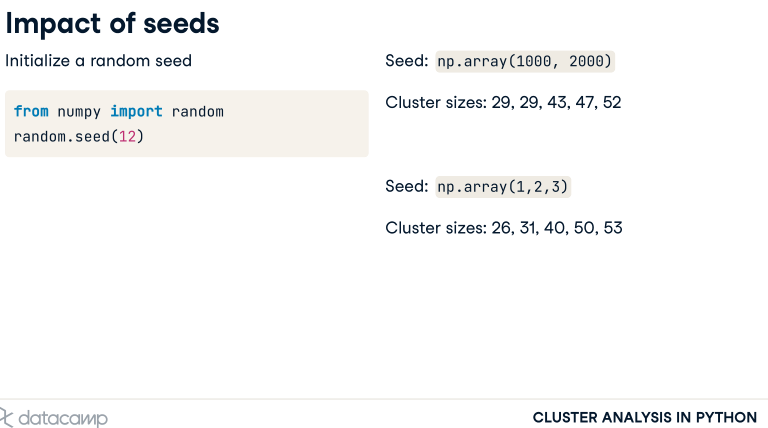

 For the purposes of testing, we take a list of randomly generated 200 points and use five clusters. 
 
 > It is seen that in the two cases the cluster sizes are different.

 **Impact of seeds: plots**

 Here are the plots to compare the resulting clusters. 
 
 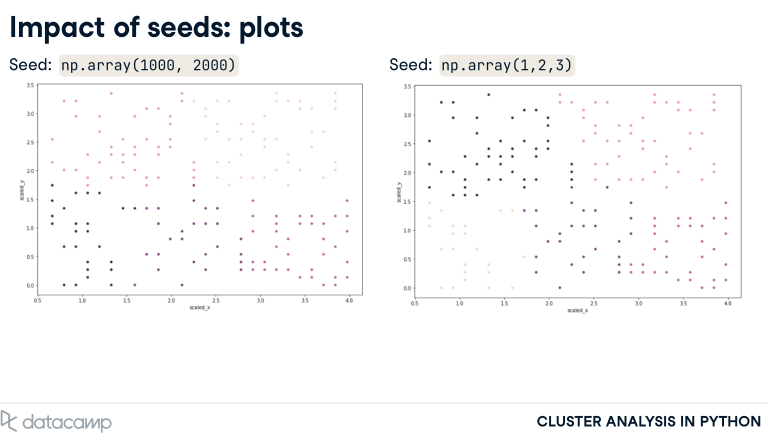
 
 You will notice that many points along the cluster boundaries have interchanged clusters. Interestingly, the effect of seeds is only seen when the data to be clustered is fairly uniform. If the data has distinct clusters before clustering is performed, the effect of seeds will not result in any changes in the formation of resulting clusters.

**Uniform clusters in k means**

To illustrate the bias in kmeans clustering towards uniform clusters to minimize variance, let us perform clustering on this set of 280 points, divided into non uniform groups of 200, 70 and 10. 

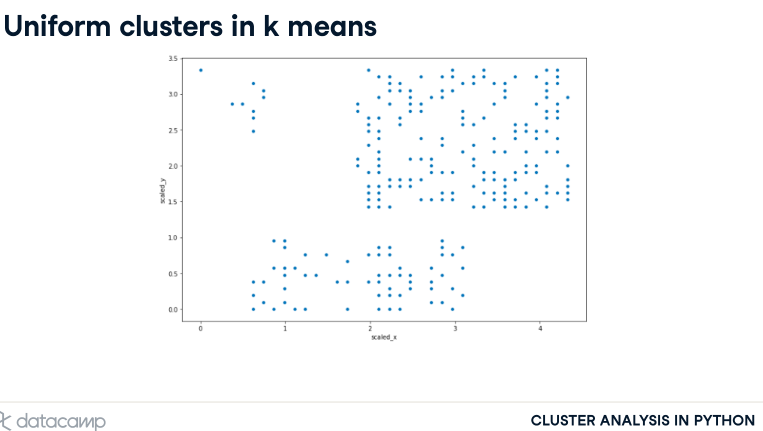

Graphically, they look distinctly separated into three clusters. Therefore, if we ran any clustering algorithm, these three clusters should be picked up. Let us test that theory with kmeans clustering first.

**Uniform clusters in k-means: a comparison**

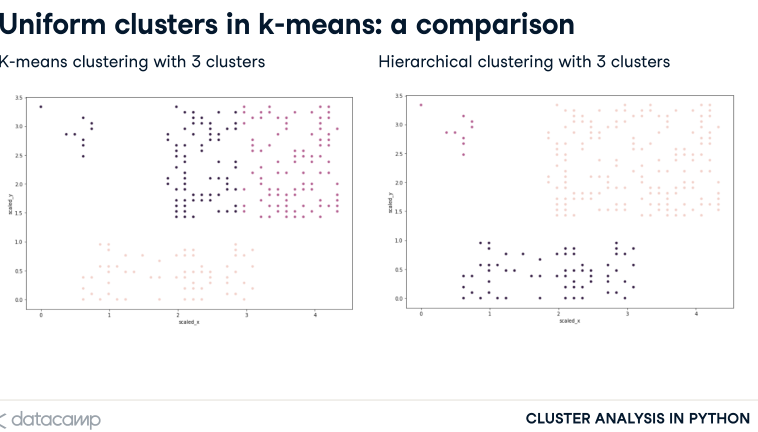

If you look at the results of k-means clustering on this data set, you get non intuitive clusters even after varying the seeds.

 This is because the very idea of k-means clustering is to minimize distortions. This results in clusters that have similar areas and not necessarily the similar number of data points. 
 
 However, when you look at the results of hierarchical clustering on the same dataset using the complete method to decide cluster proximity, you will notice that the clusters formed are intuitive and consistent with our assumption in the earlier slide.

 > Finally, we realize that each technique has its pros and cons, and you should know about the underlying assumptions of each technique before applying them. Ideally, you should spend some time pondering over your data size, its patterns and resources and time available to you before finalizing on an algorithm. Remember, clustering is still the exploratory phase of your analysis - it is perfectly fine for some trial and error at this stage.

**impact of seeds on distinct clusters**

You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

The data is stored in a Pandas data frame, comic_con. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of people at a given point in time.

* import the random class from numpy and initialize the seed with the integer 0.

```
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

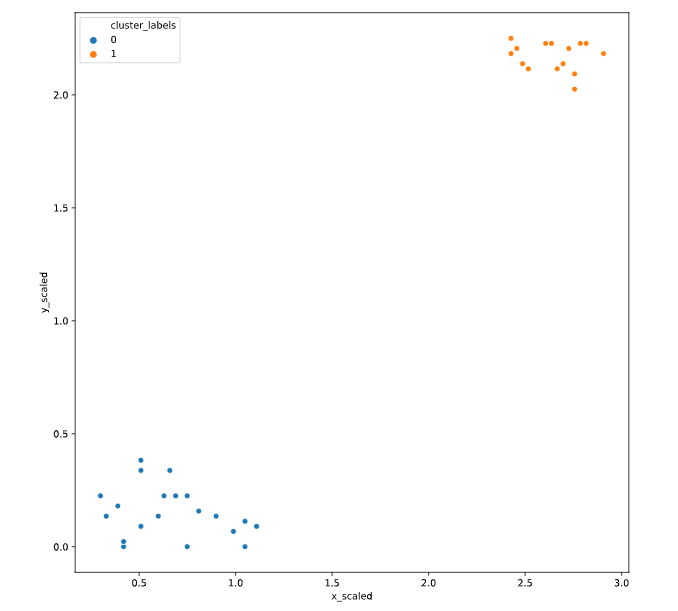

* Change your code from the earlier step so that the seed is initialized with a list [1, 2, 1000].

```
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()
```

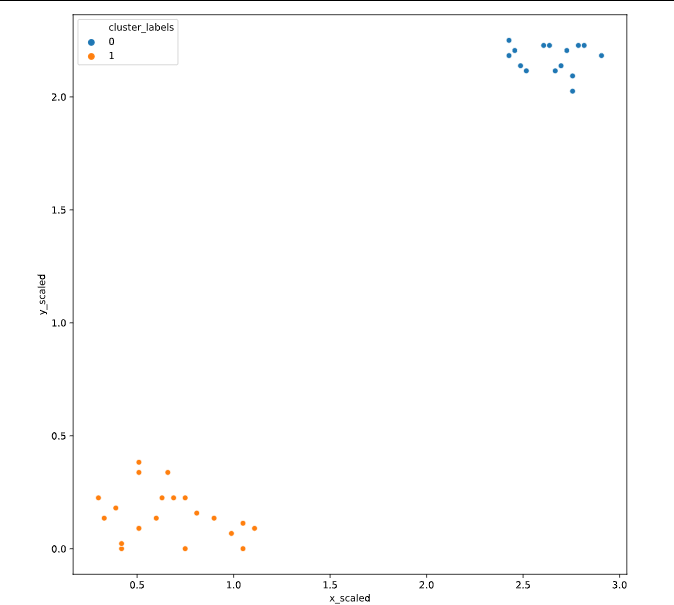

> Notice that the plots have not changed after changing the seed as the clusters are well-defined.

**Uniform clustering patterns**

let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

Here is how a typical mouse-like dataset looks like (Source).

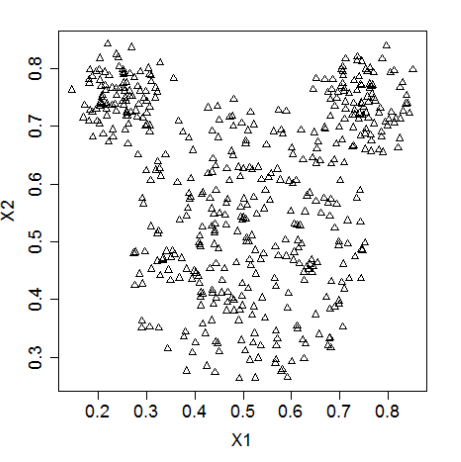

The data is stored in a Pandas data frame, mouse. x_scaled and y_scaled are the column names of the standardized X and Y coordinates of the data points.

* Import kmeans and vq functions in SciPy.
* Generate cluster centers using the kmeans() function with three clusters.
* Create cluster labels with vq() with the cluster centers generated above.

```
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()
```

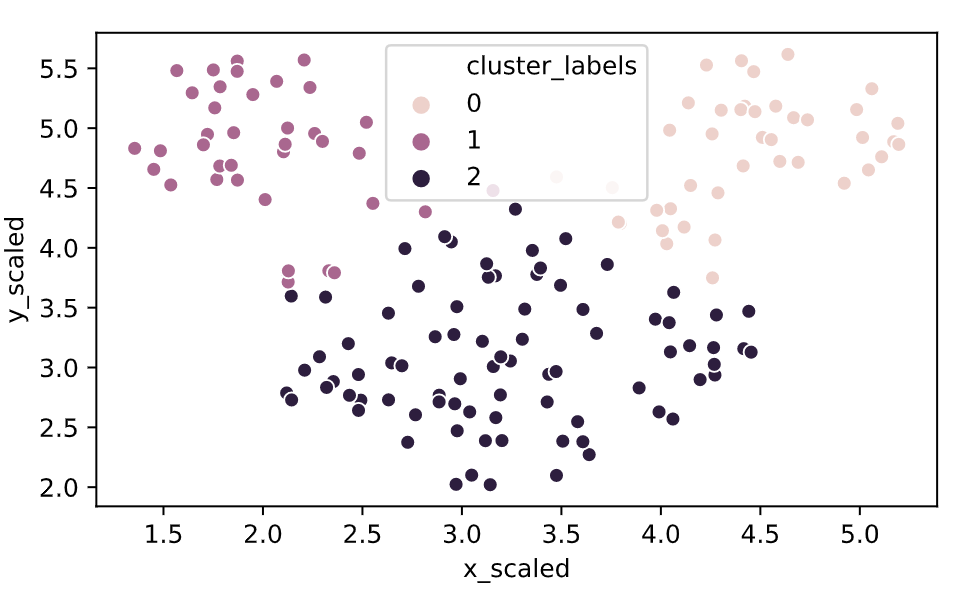

> Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary.

 This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

 **FIFA 18: defenders revisited**

 In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

defending: a number which signifies the defending attributes of a player
physical: a number which signifies the physical attributes of a player
These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

The following modules have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns. The data for this exercise is stored in a Pandas dataframe, fifa. The scaled variables are scaled_def and scaled_phy.

* Initialize the random seed to the list [1000,2000].

```
# Set up a random seed in numpy
random.seed([1000,2000])
```

* Fit the scaled data in columns scaled_def and scaled_phy into a k-means clustering algorithm with 3 clusters and assign cluster labels.

```
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)
```

* Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.

```
# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())
```

```
<script.py> output:
                    scaled_def  scaled_phy
    cluster_labels                        
    0                     3.74        8.87
    1                     1.87        7.08
    2                     2.10        8.94
```

* Create a seaborn scatter plot with scaled_def on the x-axis and scaled_phy on the y-axis, with each cluster represented by a different color.

```
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()
```

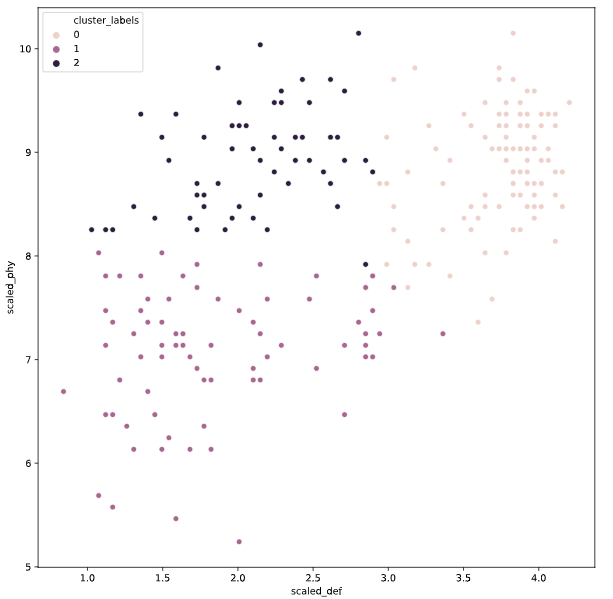

> Notice that the seed has an impact on clustering as the data is uniformly distributed.

##Clustering in Real World

The chapter first discusses the process of finding dominant colors in an image, before moving on to the problem discussed in the introduction - clustering of news articles. The chapter concludes with a discussion on clustering with multiple variables, which makes it difficult to visualize all the data.


**Dominant colors in images**

Any image consists of pixels, each pixel represents a dot in the image. A pixel consists of three values - each value is a number between 0-255, representing the amount of its red, green and blue components. 

The combination of these forms the actual color of the pixel. To find the dominant colors, we will perform k-means clustering, with its RGB components. 

> One important use of k-means clustering on images is to segment satellite images to identify surface features.

**Feature identification in satellite images**

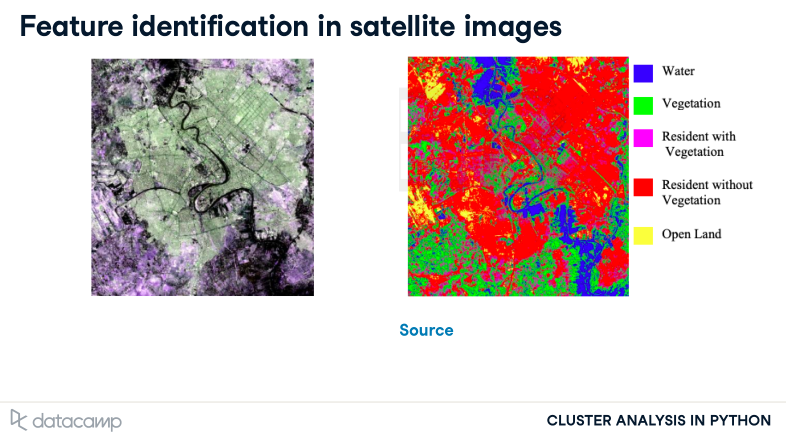



In this satellite image, you can see the terrain of a river valley. Various colors typically belong to different features.

 K-means clustering can be used to cluster them into groups, which can then be identified into various surface features like water and vegetation.

 Tools to find dominant colors:

 * The first one is the **imread method**, which *converts a JPEG image into a matrix*, which contains the RGB values of each pixel.
 * The second method is the **imshow method** which would *display colors of the cluster centers* once you perform k-means clustering on the RGB values.

**Convert image to RGB matrix**

* convert the image to pixels using the imread method of the image class. 

```
import matplotlib.image as img

image = img.imread('sea.jpg')
image.shape

(475, 764, 3)
```
> Notice that the output of this function is a MxNx3 matrix, where M and N are the dimensions of the image. In this analysis, we are going to collectively look at all pixels, and their position would not matter.




* extract all RGB values and store them in their corresponding lists

```
r = []
g = []
b = []

for row in image:
  for pixel in row:
    # A pixel contains RGB values
    temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)
```

**Data frame with RGB values**

* store lists in a Pandas data frame

```
pixels = pd.DataFrame({'red': r, 'blue': b, 'green': g})
```

* create an elbow plot

```
distortions = []
num_clusters = range(1, 11)

# Create a list of distortions from the kmeans method
for i in num_clusters:
  cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue' ,'scaled_green']], i)
  distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)

plt.show()
```

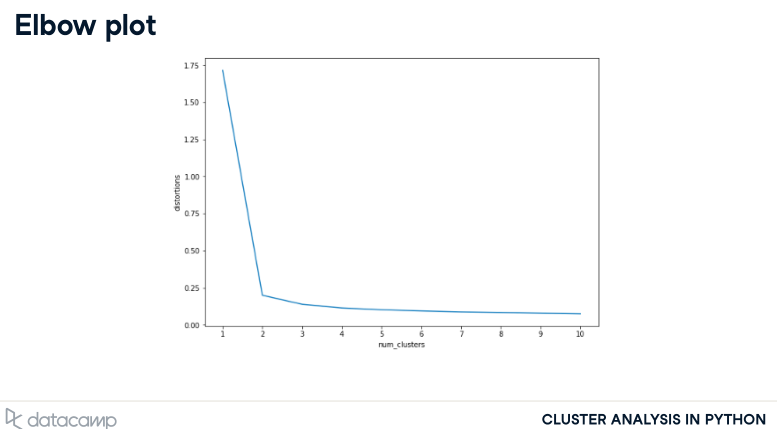

> Notice that the elbow plot indicates two clusters, which supports our initial observation of two prominent colors in the image.

**Find dominant colors**

The cluster centers obtained are standardized RGB values. 

> Recall that a **standardized value** of a variable is its actual *value divided by the standard deviation*. 

We would display the colors through the imshow method, which takes RGB values that have been scaled to the range of 0 to 1. 

 To do so, we need to multiply the standardized values of the cluster centers with their corresponding standard deviations. We saw earlier that actual RGB values take the maximum value of 255, hence we divide it by 255 to get a scaled value in the range of 0-1.

 ```
 cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], 2)

colors = []

# Find Standard Deviations
r_std, g_std, b_std = pixels[['red', 'blue', 'green']].std()

# Scale actual RGB values in range of 0-1
for cluster_center in cluster_centers:
  scaled_r, scaled_g, scaled_b = cluster_center
  colors.append((
  scaled_r * r_std/255,
  scaled_g * g_std/255,
  scaled_b * b_std/255))
```

**Display dominant colors**

* Once we have the colors with their RGB values, the imshow method is used to display them. 

```
#Dimensions: 2 x 3 (N X 3 matrix)
print(colors)

[(0.08192923122023911, 0.34205845943857993, 0.2824002984155429),
(0.893281510956742, 0.899818770315129, 0.8979114272960784)]

#Dimensions: 1 x 2 x 3 (1 X N x 3 matrix)
plt.imshow([colors])

plt.show()
```
> Note that you need to provide the colors variable encapsulated as a list, as the imshow method expects a MxNx3 matrix to display a 2D grid of colors. By doing this, we are providing a 1xNx3 matrix, which tells imshow method to display only one row of colors, where N is the number of clusters. 

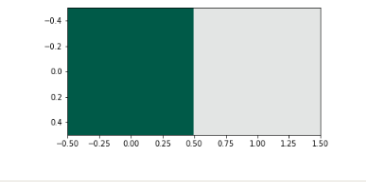

Here are the two dominant colors, which supports our preliminary observations.

**Extract RGB values from image**

There are broadly three steps to find the dominant colors in an image:

* Extract RGB values into three lists.
* Perform k-means clustering on scaled RGB values.
* Display the colors of cluster centers.


To extract RGB values, we use the imread() function of the image class of matplotlib. Empty lists, r, g and b have been initialized.

For the purpose of finding dominant colors, we will be using the following image.

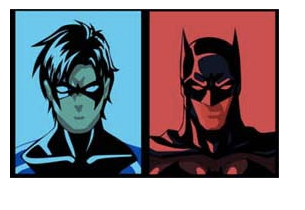

* Import image class of matplotlib.
* Read the image using the imread() function and print the dimensions of the resultant matrix.
* Store the values for the three colors from all pixels in lists r, g and b.

```
# Import image class of matplotlib
import matplotlib.image as img

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

# Store RGB values of all pixels in lists r, g and b
for pixel in batman_image:
    for temp_r, temp_g, temp_b in pixel:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
```

```
(57, 90, 3)
```

> You have successfully extracted the RGB values of the image into three lists, one for each color channel.

**How many dominant colors?**

We have loaded the following image using the imread() function of the image class of matplotlib.

The RGB values are stored in a data frame, batman_df. The RGB values have been standardized used the whiten() function, stored in columns, scaled_red, scaled_blue and scaled_green.

Construct an elbow plot with the data frame. How many dominant colors are present?

* Create a list of distortions based on each value in num_clusters by running the kmeans() function.
* Create a data frame elbow_plot with the lists: num_clusters and distortions.
* Plot the data with seaborn's .lineplot() method with num_clusters on the x-axis and distortions on the y-axis.


```
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()
```

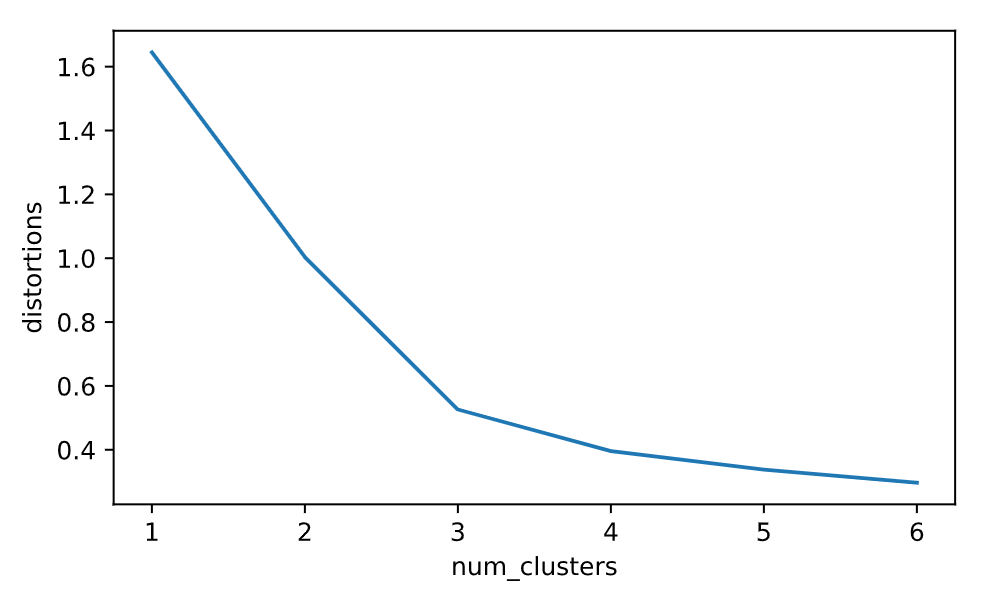

> Notice that there are three distinct colors present in the image, which is supported by the elbow plot.

**Display dominant colors**

To display the dominant colors, convert the colors of the cluster centers to their raw values and then converted them to the range of 0-1, using the following formula: ```converted_pixel = standardized_pixel * pixel_std / 255```

The RGB values are stored in a data frame, batman_df. The scaled RGB values are stored in columns, scaled_red, scaled_blue and scaled_green. The cluster centers are stored in the variable cluster_centers, which were generated using the kmeans() function with three clusters.

* Get standard deviations of each color from the data frame and store it in r_std, g_std, b_std.
* For each cluster center, convert the standardized RGB values to scaled values in the range of 0-1.
* Display the colors of the cluster centers.

```
# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r *  r_std/255,
        scaled_g *  g_std/255,
        scaled_b *  b_std/255
    ))

# Display colors of cluster centers
plt.imshow([colors])
plt.show()
```

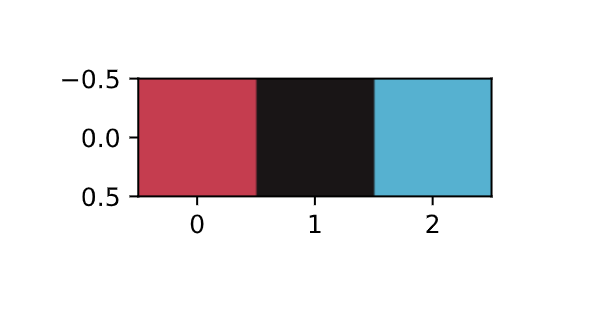

>  Notice the three colors resemble the three that are indicative from visual inspection of the image.

###Document clustering

Document clustering uses some concepts from natural language processing, or NLP. 

*Although NLP is a huge subject, let us try and understand its basics to apply in this use case.*

**Clean and tokenize data**

The text in itself cannot be analyzed before converting into smaller parts called tokens, which we achieve by using NLTK's word_tokenize method. 

* First, we remove all special characters from tokens and check if it contains to any stop words. 
* return the cleaned tokens. 

>  clean the data for anything that does not add value to our analysis. Some items to remove include punctuation, emoticons and words such as "the, is, are". 

```
from nltk.tokenize import word_tokenize
import re

def remove_noise(text, stop_words = []):
  tokens = word_tokenize(text)
  cleaned_tokens = []
  for token in tokens:
    token = re.sub('[^A-Za-z0-9]+', '', token)
    if len(token) > 1 and token.lower() not in stop_words:
      # Get lowercase
      cleaned_tokens.append(token.lower())
    return cleaned_tokens
remove_noise("It is lovely weather we are having. I hope the weather continues.")

['lovely', 'weather', 'hope', 'weather', 'continues']
```

Above is the output of sample quote from the movie Pink Panther.

**Document term matrix and sparse matrices**

Once relevant terms have been extracted, a matrix is formed, with the terms and documents as dimensions. An element of the matrix signifies how many times a term has occurred in each document.

 Most elements are zeros, hence, sparse matrices are used to store these matrices more efficiently. A sparse matrix only contains terms which have non zero elements.

 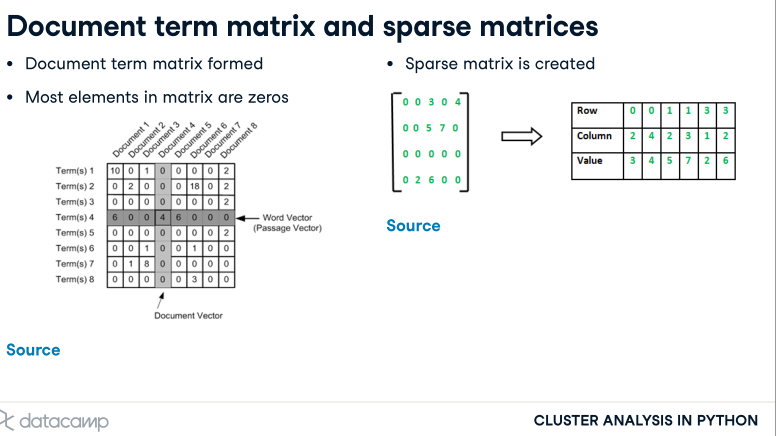

**TF-IDF (Term Frequency - Inverse Document Frequency)**

To find the TF-IDF of terms in a group of documents, we use the TfidfVectorizer class of sklearn. 

* We initialize it with the following features: max_df and min_df signify the maximum and minimum fraction of documents a word should occur in - here we go ahead with terms that appear in more than 20% but less than 80% documents. 
* We keep the top 50 terms. 
* Finally, we use our custom function as a tokenizer. The fit_transform method creates the TF-IDF matrix for the data, which is a sparse matrix.

>  find the TF-IDF of the terms, or a weighted statistic that describes the importance of a term in a document.


```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=50, min_df=0.2, tokenizer=remove_noise)
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
```


**Clustering with sparse matrix**

**kmeans in scipy does not work with sparse matrices, so we convert the tfidf matrix to its expanded form using the todense method**. kmeans can then be applied to get the cluster centers. 

We do not use the elbow plot, as it will take an erratic form due to the high number of variables.


```
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

```
**Top terms per cluster**

>  Finally, we cluster the TF-IDF matrix and display the top terms in each cluster

Each cluster center is a list of tfidf weights, which signifies the importance of each term in the matrix. To find the top terms,
* we first create a list of all terms. 
* Then, we create a dictionary with the terms are keys and tfidf as values. 
* We then sort the dictionary by its values in descending order and display top terms. Zip method joins two lists in python. 
* We analyze a list of 1000 hotel reviews to find that the top terms in one of the clusters were room, hotel, and staff, whereas the other cluster, had bad, location, and breakfast as the top terms.

```
terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
  center_terms = dict(zip(terms, list(cluster_centers[i])))
  sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
  print(sorted_terms[:3])

['room', 'hotel', 'staff']
['bad', 'location', 'breakfast']
```


There are more considerations when it comes to NLP.

 For instance, you can modify the remove_noise method to filter hyperlinks, or replace emoticons with text. You can normalize every word to its base form: for instance, run, ran and running are the forms of the same verb run. Further, the todense method may not work with large datasets, and you may need to consider an implementation of k-means that works with sparse matrices.

**TF-IDF of movie plots**

Let us use the plots of randomly selected movies to perform document clustering on. Before performing clustering on documents, they need to be cleaned of any unwanted noise (such as special characters and stop words) and converted into a sparse matrix through TF-IDF of the documents.

Use the TfidfVectorizer class to perform the TF-IDF of movie plots stored in the list plots. The remove_noise() function is available to use as a tokenizer in the TfidfVectorizer class. The .fit_transform() method fits the data into the TfidfVectorizer objects and then generates the TF-IDF sparse matrix.

Note: It takes a few seconds to run the .fit_transform() method.

* Import TfidfVectorizer class from sklearn.
* Initialize the TfidfVectorizer class with minimum and maximum frequencies of 0.1 and 0.75, and 50 maximum features.
* Use the fit_transform() method on the initialized TfidfVectorizer class with the list plots.

```
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50,
min_df=0.1, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)
```

> You have successfully created the sparse matrix. Let us now perform clustering on the matrix.

**Top terms in movie clusters**

Now that you have created a sparse matrix, generate cluster centers and print the top three terms in each cluster. Use the .todense() method to convert the sparse matrix, tfidf_matrix to a normal matrix for the kmeans() function to process. Then, use the .get_feature_names() method to get a list of terms in the tfidf_vectorizer object. The zip() function in Python joins two lists.

The tfidf_vectorizer object and sparse matrix, tfidf_matrix, from the previous have been retained in this exercise. kmeans has been imported from SciPy.

With a higher number of data points, the clusters formed would be defined more clearly. However, this requires some computational power, making it difficult to accomplish in an exercise here.

* Generate cluster centers through the kmeans() function.
* Generate a list of terms from the tfidf_vectorizer object.
* Print top 3 terms of each cluster.

```
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])
```

```
<script.py> output:
    ['father', 'back', 'one']
    ['police', 'man', 'killed']
```

 > Notice positive, warm words in the first cluster and words referring to action in the second cluster.

**Clustering with multiple features**

In the final video exercise of the course, let us perform clustering on the FIFA dataset again. However, this time we will consider more than two variables and try to interpret and validate the results of clustering.

**Basic checks**

While it is important to understand that **all features can not be visualized and assessed at the same time when clustering** with more than 3 features, we will discuss a few techniques to validate your results. 

>  This step assumes that you have created the elbow plot, performed the clustering process and generated cluster labels. 

1. First, you can check how the cluster centers vary with respect to the overall data. 

```
# Cluster centers
print(fifa.groupby('cluster_labels')[['scaled_heading_accuracy',
'scaled_volleys', 'scaled_finishing']].mean())
```

> If you notice that cluster centers of some features do not vary significantly with respect to the overall data, perhaps, it is an indication that you can drop that feature in the next run.

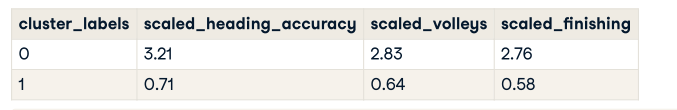

2. Next, you can also look at the sizes of the clusters formed. 
```
# Cluster sizes
print(fifa.groupby('cluster_labels')['ID'].count())
```
> If one or more clusters are significantly smaller than the rest, you may want to double if their cluster centers are similar to other clusters. If the answer is yes, you may want to reduce the number of clusters in subsequent runs. 
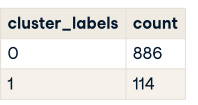
In this case, you notice that the second cluster is significantly smaller. It is because we have performed clustering on three attacking attributes, for which goalkeepers have a very low value as indicated by the cluster centers. Hence, the smaller cluster is composed primarily of goalkeepers, as we will explore later.

**Visualizations**

Even though all variables cannot be visualized across clusters, there are other simpler visualizations that help you understand the results of clustering.


> You may either visualize cluster centers or other variables stacked against each other.

 In pandas, you can use the plot method after groupby to generate such plots. 
```
# Plot cluster centers
fifa.groupby('cluster_labels')[scaled_features].mean().plot(kind='bar')

plt.show()
``` 

 In this example, the bar chart is demonstrated. 
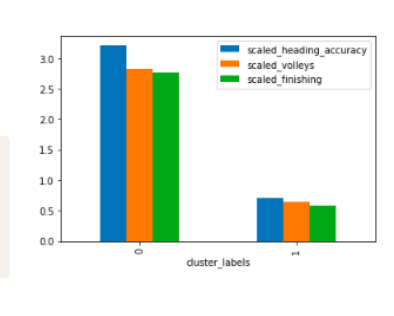


**Top items in clusters**

Finally, let us check five players from each cluster. 

```
# Get the name column of top 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
  print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])
```

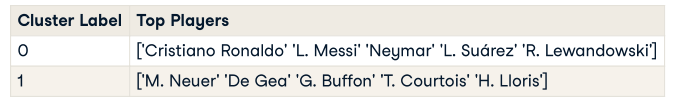

> As expected the first cluster has top attack minded players like Ronaldo, Messi and Neymar. As explained earlier, the second cluster has top goalkeepers like Manuel Neuer, De Gea and Buffon, who have very low values for traits like volleys and heading accuracy. This determines that our clustering was appropriate.

> When dealing with a large number of features, certain techniques of feature reduction may be used. Two popular tools to reduce the number of features are factor analysis and multidimensional scaling. Although these are beyond the scope of this course, you may consider them as a precursor to clustering.

**Basic checks on clusters**

In the FIFA 18 dataset, we have concentrated on defenders in previous exercises. Let us try to focus on attacking attributes of a player. Pace (pac), Dribbling (dri) and Shooting (sho) are features that are present in attack minded players. In this exercise, k-means clustering has already been applied on the data using the scaled values of these three attributes. Try some basic checks on the clusters so formed.

The data is stored in a Pandas data frame, fifa. The scaled column names are present in a list scaled_features. The cluster labels are stored in the cluster_labels column. Recall the .count() and .mean() methods in Pandas help you find the number of observations and mean of observations in a data frame.

* Print the size of the clusters by grouping the column cluster_labels.
* Print the mean values of the wages of the players in each cluster. eur_wage is the column name that stores the wages of a player in Euros.

```
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())
```

```
<script.py> output:
    cluster_labels
    0     83
    1    107
    2     60
    Name: ID, dtype: int64
    cluster_labels
    0   132108.43
    1   130308.41
    2   117583.33
    Name: eur_wage, dtype: float64
```

> In this example, the cluster sizes are not very different, and there are no significant differences that can be seen in the wages. Further analysis is required to validate these clusters.

**FIFA 18: what makes a complete player?**

The overall level of a player in FIFA 18 is defined by six characteristics: pace (pac), shooting (sho), passing (pas), dribbling (dri), defending (def), physical (phy).

Here is a sample card:
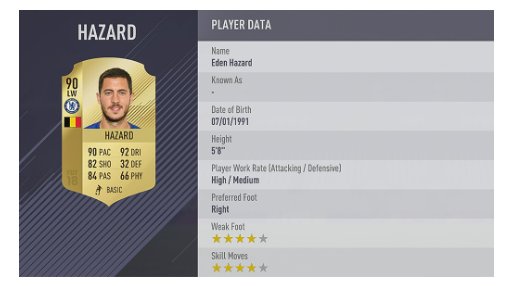

In this exercise, you will use all six characteristics to create clusters. The data for this exercise is stored in a Pandas dataframe, fifa. features is the list of these column names and scaled_features is the list of columns which contains their scaled values. The following have been pre-loaded: kmeans, vq from scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns.

Before you start the exercise, you may wish to explore scaled_features in the console to check out the list of six scaled columns names.

* Use the kmeans() algorithm to create 2 clusters using the list of columns, scaled_features.

```
In [2]:
scaled_features
Out[2]:

['scaled_pac',
 'scaled_sho',
 'scaled_pas',
 'scaled_dri',
 'scaled_def',
 'scaled_phy']
```

```
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)
```

* Assign cluster labels to each row using vq() and print cluster centers of scaled_features using the .mean() method of Pandas.

```
# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())
```

```
<script.py> output:
                    scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
    cluster_labels                                                               
    0                     6.68        5.43        8.46        8.51        2.50   
    1                     5.44        3.66        7.17        6.76        3.97   
    
                    scaled_phy  
    cluster_labels              
    0                     8.34  
    1                     9.21  
```

* Plot a bar chart of scaled attributes of each cluster center using the .plot() method of Pandas.

```
# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()
```

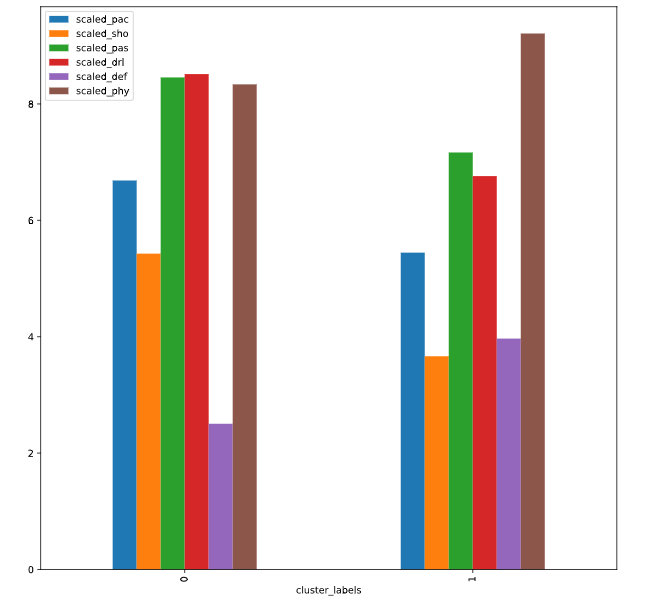

* Print the names of first 5 players in each cluster, using the name column.

```

# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])
```

```
    0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
    1 ['Sergio Ramos' 'G. Chiellini' 'D. Godín' 'Thiago Silva' 'M. Hummels']
```

> The data was sorted before you performed the clustering. Notice the top players in each cluster are representative of the overall characteristics of the cluster - one of the clusters primarily represents attackers, whereas the other represents defenders. Surprisingly, a top goalkeeper Manuel Neuer is seen in the attackers group, but he is known for going out of the box and participating in open play, which are reflected in his FIFA 18 attributes.